## Machine Learning to predict Chagas Disease

In [1]:
# data processing packages
import pandas as pd
import numpy as np 

pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 100) 

# graphical packages
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# SCIKIT-LEARN
from sklearn.metrics import roc_curve, auc, top_k_accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import brier_score_loss, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import scikitplot as skplt


# Additional algorithms packages
from xgboost import XGBClassifier
import lightgbm as lgb
from boruta import BorutaPy
import shap

# warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

# seed
np.random.seed(42)

In [2]:
# loading the datsaset
dataset = pd.read_csv('dados_questionario.csv', sep = ';')

In [3]:
dataset.head()

,id,cidade,coleta,nascimento,idade_coleta,sexo,diagnosticado_com_DC,tratamento_dc,familiar_dc,parentesco,parentesco.filho.filha,parentesco.avo.avo,parentesco.tio.tia,parantesco.pai,parentesco.mae,parentesco.irma.irmao,parentesco.nao.se.aplica,picada_barbeiro,viveu_regiao_barbeiro,casa_madeira_pau_a_pique,coleta_elisa,resultado_elisa,atendimento
0,1,Espinosa,23/07/2019,02/04/1964,55.0,Masculino,Não,Não,Sim,"Filho, filha / Avó, avô",1.0,1.0,0.0,0.0,0.0,0.0,0.0,Sim,Sim,Sim,Realizada coleta venosa e capilar em 23/07/2019,NEGATIVO,Não
1,2,São Francisco,08/02/2019,10/04/1991,27.0,Masculino,Não,Não se aplica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Sim,Não,NaN,NEGATIVO,Não
2,3,São Francisco,08/02/2019,16/09/1983,35.0,Feminino,Não,Não se aplica,Não,Não se aplica,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Não,Sim,Sim,NaN,NEGATIVO,Não
3,4,São Francisco,08/02/2019,06/12/1981,37.0,Feminino,Não,Não se aplica,Não,Não se aplica,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Não,Sim,Sim,NaN,NEGATIVO,Não
4,5,São Francisco,08/02/2019,25/08/1982,36.0,Feminino,Não,Não se aplica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,NaN,NEGATIVO,Não


In [4]:
dataset.tail()

,id,cidade,coleta,nascimento,idade_coleta,sexo,diagnosticado_com_DC,tratamento_dc,familiar_dc,parentesco,parentesco.filho.filha,parentesco.avo.avo,parentesco.tio.tia,parantesco.pai,parentesco.mae,parentesco.irma.irmao,parentesco.nao.se.aplica,picada_barbeiro,viveu_regiao_barbeiro,casa_madeira_pau_a_pique,coleta_elisa,resultado_elisa,atendimento
2056,2057,São Francisco,11/11/2019,26/09/1973,46.0,Feminino,Não,Não,Sim,"Pai, mãe, tio, tia por parte de pai",0.0,0.0,1.0,1.0,1.0,0.0,0.0,Não sei,Sim,Sim,NaN,NEGATIVO,Não
2057,2058,São Francisco,11/11/2019,31/12/1959,59.0,Masculino,Não,Não,Não sei,Não se aplica,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Não sei,Sim,Sim,NaN,NEGATIVO,Não
2058,2059,São Francisco,11/11/2019,21/03/1984,35.0,Masculino,Não,Não,Não,Não se aplica,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Não sei,Sim,Sim,NaN,NEGATIVO,Não
2059,2060,São Francisco,11/11/2019,03/04/1954,65.0,Masculino,Não,Não,Não,Não se aplica,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Sim,Sim,Sim,NaN,NEGATIVO,Não
2060,2061,São Francisco,11/11/2019,05/08/1989,30.0,Feminino,Não,Não,Não sei,Não se aplica,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Não sei,Não,Não,NaN,NEGATIVO,Não


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2061 non-null   int64  
 1   cidade                    2061 non-null   object 
 2   coleta                    2061 non-null   object 
 3   nascimento                2057 non-null   object 
 4   idade_coleta              2057 non-null   float64
 5   sexo                      2061 non-null   object 
 6   diagnosticado_com_DC      2060 non-null   object 
 7   tratamento_dc             2056 non-null   object 
 8   familiar_dc               2031 non-null   object 
 9   parentesco                2032 non-null   object 
 10  parentesco.filho.filha    2026 non-null   float64
 11  parentesco.avo.avo        2026 non-null   float64
 12  parentesco.tio.tia        2026 non-null   float64
 13  parantesco.pai            2026 non-null   float64
 14  parentes

In [6]:
# Checking unique categories    
cat_stats = pd.DataFrame(columns = ['Column', 'Values', 'Categories'])
tmp = pd.DataFrame()

for c in dataset.columns:
    tmp['Column'] = [c]
    tmp['Values'] = [dataset[c].unique()]
    tmp['Categories'] = f"The variable {c} has {len(list(dataset[c].unique()))} unique categories"

    cat_stats = cat_stats.append(tmp)
    
cat_stats


,Column,Values,Categories
0,id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",The variable id has 2061 unique categories
0,cidade,"[Espinosa, São Francisco]",The variable cidade has 2 unique categories
0,coleta,"[23/07/2019, 08/02/2019, 06/02/2019, 18/02/201...",The variable coleta has 27 unique categories
0,nascimento,"[02/04/1964, 10/04/1991, 16/09/1983, 06/12/198...",The variable nascimento has 1938 unique catego...
0,idade_coleta,"[55.0, 27.0, 35.0, 37.0, 36.0, 30.0, 38.0, 43....",The variable idade_coleta has 75 unique catego...
0,sexo,"[Masculino, Feminino, Masculino , Feminino ]",The variable sexo has 4 unique categories
0,diagnosticado_com_DC,"[Não, Sim, Não sei, nan]",The variable diagnosticado_com_DC has 4 unique...
0,tratamento_dc,"[Não, Não se aplica, Sim , nan, Não sei, Não s...",The variable tratamento_dc has 6 unique catego...
0,familiar_dc,"[Sim, nan, Não, Não sei]",The variable familiar_dc has 4 unique categories
0,parentesco,"[Filho, filha / Avó, avô, nan, Não se aplica, ...",The variable parentesco has 49 unique categories


In [7]:
# select the variables to keep in the model
to_keep = ['idade_coleta', 'sexo','familiar_dc','parentesco.filho.filha','parentesco.avo.avo','parentesco.tio.tia',
           'parantesco.pai','parentesco.mae','parentesco.irma.irmao',
           'picada_barbeiro', 'viveu_regiao_barbeiro','casa_madeira_pau_a_pique',
          'resultado_elisa']

In [8]:
filtered_dataset = dataset[to_keep]

In [9]:
filtered_dataset.head()

,idade_coleta,sexo,familiar_dc,parentesco.filho.filha,parentesco.avo.avo,parentesco.tio.tia,parantesco.pai,parentesco.mae,parentesco.irma.irmao,picada_barbeiro,viveu_regiao_barbeiro,casa_madeira_pau_a_pique,resultado_elisa
0,55.0,Masculino,Sim,1.0,1.0,0.0,0.0,0.0,0.0,Sim,Sim,Sim,NEGATIVO
1,27.0,Masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Sim,Não,NEGATIVO
2,35.0,Feminino,Não,0.0,0.0,0.0,0.0,0.0,0.0,Não,Sim,Sim,NEGATIVO
3,37.0,Feminino,Não,0.0,0.0,0.0,0.0,0.0,0.0,Não,Sim,Sim,NEGATIVO
4,36.0,Feminino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,NEGATIVO


In [10]:
filtered_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade_coleta              2057 non-null   float64
 1   sexo                      2061 non-null   object 
 2   familiar_dc               2031 non-null   object 
 3   parentesco.filho.filha    2026 non-null   float64
 4   parentesco.avo.avo        2026 non-null   float64
 5   parentesco.tio.tia        2026 non-null   float64
 6   parantesco.pai            2026 non-null   float64
 7   parentesco.mae            2026 non-null   float64
 8   parentesco.irma.irmao     2026 non-null   float64
 9   picada_barbeiro           2057 non-null   object 
 10  viveu_regiao_barbeiro     2060 non-null   object 
 11  casa_madeira_pau_a_pique  2056 non-null   object 
 12  resultado_elisa           2061 non-null   object 
dtypes: float64(7), object(6)
memory usage: 209.4+ KB


In [11]:
# Verificando quantas categorias únicas por variável existem       
cat_stats = pd.DataFrame(columns = ['Column', 'Values', 'Categories'])
tmp = pd.DataFrame()

for c in filtered_dataset.columns:
    tmp['Column'] = [c]
    tmp['Values'] = [filtered_dataset[c].unique()]
    tmp['Categories'] = f"The variable {c} has {len(list(filtered_dataset[c].unique()))} unique categories"

    cat_stats = cat_stats.append(tmp)
    
cat_stats


,Column,Values,Categories
0,idade_coleta,"[55.0, 27.0, 35.0, 37.0, 36.0, 30.0, 38.0, 43....",The variable idade_coleta has 75 unique catego...
0,sexo,"[Masculino, Feminino, Masculino , Feminino ]",The variable sexo has 4 unique categories
0,familiar_dc,"[Sim, nan, Não, Não sei]",The variable familiar_dc has 4 unique categories
0,parentesco.filho.filha,"[1.0, nan, 0.0]",The variable parentesco.filho.filha has 3 uniq...
0,parentesco.avo.avo,"[1.0, nan, 0.0]",The variable parentesco.avo.avo has 3 unique c...
0,parentesco.tio.tia,"[0.0, nan, 1.0]",The variable parentesco.tio.tia has 3 unique c...
0,parantesco.pai,"[0.0, nan, 1.0]",The variable parantesco.pai has 3 unique categ...
0,parentesco.mae,"[0.0, nan, 1.0]",The variable parentesco.mae has 3 unique categ...
0,parentesco.irma.irmao,"[0.0, nan, 1.0]",The variable parentesco.irma.irmao has 3 uniqu...
0,picada_barbeiro,"[Sim, Não, Não sei , nan]",The variable picada_barbeiro has 4 unique cate...


In [12]:
# adjusting the variables for values inconsistence
filtered_dataset['sexo'] = filtered_dataset['sexo'].replace(['Feminino '], 'Feminino')
filtered_dataset['sexo'] = filtered_dataset['sexo'].replace(['Masculino '], 'Masculino')
filtered_dataset['resultado_elisa'] = filtered_dataset['resultado_elisa'].replace(['POSITIVO '], 'POSITIVO')
filtered_dataset['resultado_elisa'] = filtered_dataset['resultado_elisa'].replace(['NEGATIVO '], 'NEGATIVO')


In [13]:
# removing incoclusive outcomes and nan
filtered_dataset = filtered_dataset[filtered_dataset['resultado_elisa']!='INCONCLUSIVO']
filtered_dataset = filtered_dataset.dropna(subset=['resultado_elisa'])
filtered_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2060
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade_coleta              2002 non-null   float64
 1   sexo                      2006 non-null   object 
 2   familiar_dc               1976 non-null   object 
 3   parentesco.filho.filha    1971 non-null   float64
 4   parentesco.avo.avo        1971 non-null   float64
 5   parentesco.tio.tia        1971 non-null   float64
 6   parantesco.pai            1971 non-null   float64
 7   parentesco.mae            1971 non-null   float64
 8   parentesco.irma.irmao     1971 non-null   float64
 9   picada_barbeiro           2002 non-null   object 
 10  viveu_regiao_barbeiro     2005 non-null   object 
 11  casa_madeira_pau_a_pique  2001 non-null   object 
 12  resultado_elisa           2006 non-null   object 
dtypes: float64(7), object(6)
memory usage: 219.4+ KB


In [14]:
filtered_dataset.isnull().sum()

idade_coleta                 4
sexo                         0
familiar_dc                 30
parentesco.filho.filha      35
parentesco.avo.avo          35
parentesco.tio.tia          35
parantesco.pai              35
parentesco.mae              35
parentesco.irma.irmao       35
picada_barbeiro              4
viveu_regiao_barbeiro        1
casa_madeira_pau_a_pique     5
resultado_elisa              0
dtype: int64

In [15]:
filtered_dataset_dummies = pd.get_dummies(filtered_dataset, columns=['sexo','picada_barbeiro', 
                                             'viveu_regiao_barbeiro', 
                                             'casa_madeira_pau_a_pique', 'familiar_dc'],dummy_na=True,drop_first=True)

In [16]:
filtered_dataset_dummies

,idade_coleta,parentesco.filho.filha,parentesco.avo.avo,parentesco.tio.tia,parantesco.pai,parentesco.mae,parentesco.irma.irmao,resultado_elisa,sexo_Masculino,sexo_nan,picada_barbeiro_Não sei,picada_barbeiro_Sim,picada_barbeiro_nan,viveu_regiao_barbeiro_Não sei,viveu_regiao_barbeiro_Sim,viveu_regiao_barbeiro_nan,casa_madeira_pau_a_pique_Sim,casa_madeira_pau_a_pique_nan,familiar_dc_Não sei,familiar_dc_Sim,familiar_dc_nan
0,55.0,1.0,1.0,0.0,0.0,0.0,0.0,NEGATIVO,1,0,0,1,0,0,1,0,1,0,0,1,0
1,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVO,1,0,0,1,0,0,1,0,0,0,0,0,1
2,35.0,0.0,0.0,0.0,0.0,0.0,0.0,NEGATIVO,0,0,0,0,0,0,1,0,1,0,0,0,0
3,37.0,0.0,0.0,0.0,0.0,0.0,0.0,NEGATIVO,0,0,0,0,0,0,1,0,1,0,0,0,0
4,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVO,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,46.0,0.0,0.0,1.0,1.0,1.0,0.0,NEGATIVO,0,0,1,0,0,0,1,0,1,0,0,1,0
2057,59.0,0.0,0.0,0.0,0.0,0.0,0.0,NEGATIVO,1,0,1,0,0,0,1,0,1,0,1,0,0
2058,35.0,0.0,0.0,0.0,0.0,0.0,0.0,NEGATIVO,1,0,1,0,0,0,1,0,1,0,0,0,0
2059,65.0,0.0,0.0,0.0,0.0,0.0,0.0,NEGATIVO,1,0,0,1,0,0,1,0,1,0,0,0,0


In [17]:
filtered_dataset_dummies[['resultado_elisa']] = filtered_dataset_dummies[['resultado_elisa']].apply(LabelEncoder().fit_transform)

In [18]:
filtered_dataset_dummies.head().T

,0,1,2,3,4
idade_coleta,55.0,27.0,35.0,37.0,36.0
parentesco.filho.filha,1.0,NaN,0.0,0.0,NaN
parentesco.avo.avo,1.0,NaN,0.0,0.0,NaN
parentesco.tio.tia,0.0,NaN,0.0,0.0,NaN
parantesco.pai,0.0,NaN,0.0,0.0,NaN
parentesco.mae,0.0,NaN,0.0,0.0,NaN
parentesco.irma.irmao,0.0,NaN,0.0,0.0,NaN
resultado_elisa,0.0,0.0,0.0,0.0,0.0
sexo_Masculino,1.0,1.0,0.0,0.0,0.0
sexo_nan,0.0,0.0,0.0,0.0,0.0


In [19]:
list(filtered_dataset_dummies.columns)

['idade_coleta',
 'parentesco.filho.filha',
 'parentesco.avo.avo',
 'parentesco.tio.tia',
 'parantesco.pai',
 'parentesco.mae',
 'parentesco.irma.irmao',
 'resultado_elisa',
 'sexo_Masculino',
 'sexo_nan',
 'picada_barbeiro_Não sei ',
 'picada_barbeiro_Sim',
 'picada_barbeiro_nan',
 'viveu_regiao_barbeiro_Não sei',
 'viveu_regiao_barbeiro_Sim',
 'viveu_regiao_barbeiro_nan',
 'casa_madeira_pau_a_pique_Sim',
 'casa_madeira_pau_a_pique_nan',
 'familiar_dc_Não sei',
 'familiar_dc_Sim',
 'familiar_dc_nan']

In [20]:
### translating the variables from PT to EN
filtered_dataset_dummies = filtered_dataset_dummies.rename(columns = {"idade_coleta":"Numeric Age",
                                                                      "parentesco.filho.filha":"Kinship (son or daughter)",
                                                                      "parentesco.avo.avo": "Kinship (grandparent or grandmother)",
                                                                      "parentesco.tio.tia":"Kinship (uncle or aunt)",
                                                                      "parantesco.pai":"Kinship (father)",
                                                                      'parentesco.mae': "Kinship (mother)",
                                                                      'parentesco.irma.irmao': "Kinship (brother or sister)", 
                                                                      'resultado_elisa': "Elisa test result",
                                                                      'sexo_Masculino':"Sex (male)",
                                                                      'sexo_nan':"Sex (unassigned)",
                                                                      'picada_barbeiro_Não sei ': "Stung by the kissing bug (does not know)",
                                                                      'picada_barbeiro_Sim':"Stung by the kissing bug (yes)",
                                                                      'picada_barbeiro_nan': "Stung by the kissing bug (unassigned)",
                                                                      'viveu_regiao_barbeiro_Não sei':"Lived in a region with kissing bug (does not know)",
                                                                      'viveu_regiao_barbeiro_Sim':"Lived in a region with kissing bug (yes)",
                                                                      'viveu_regiao_barbeiro_nan':"Lived in a region with kissing bug (unassigned)",
                                                                      'casa_madeira_pau_a_pique_Sim':"Wooden house or wattle and daub (yes)",
                                                                      'casa_madeira_pau_a_pique_nan':"Wooden house or wattle and daub (unassigned)",
                                                                      'familiar_dc_Não sei':"Family history of chagas disease (does not know)",
                                                                      'familiar_dc_Sim':"Family history of chagas disease (yes)",
                                                                      'familiar_dc_nan':"Family history of chagas disease (unassigned)"
                                                                     }) 

In [21]:
list(filtered_dataset_dummies.columns)

['Numeric Age',
 'Kinship (son or daughter)',
 'Kinship (grandparent or grandmother)',
 'Kinship (uncle or aunt)',
 'Kinship (father)',
 'Kinship (mother)',
 'Kinship (brother or sister)',
 'Elisa test result',
 'Sex (male)',
 'Sex (unassigned)',
 'Stung by the kissing bug (does not know)',
 'Stung by the kissing bug (yes)',
 'Stung by the kissing bug (unassigned)',
 'Lived in a region with kissing bug (does not know)',
 'Lived in a region with kissing bug (yes)',
 'Lived in a region with kissing bug (unassigned)',
 'Wooden house or wattle and daub (yes)',
 'Wooden house or wattle and daub (unassigned)',
 'Family history of chagas disease (does not know)',
 'Family history of chagas disease (yes)',
 'Family history of chagas disease (unassigned)']

In [22]:
# selecting the categorial variables
categorical_features = ['Kinship (son or daughter)',
 'Kinship (grandparent or grandmother)',
 'Kinship (uncle or aunt)',
 'Kinship (father)',
 'Kinship (mother)',
 'Kinship (brother or sister)',
 'Elisa test result',
 'Sex (male)',
 'Sex (unassigned)',
 'Stung by the kissing bug (does not know)',
 'Stung by the kissing bug (yes)',
 'Stung by the kissing bug (unassigned)',
 'Lived in a region with kissing bug (does not know)',
 'Lived in a region with kissing bug (yes)',
 'Lived in a region with kissing bug (unassigned)',
 'Wooden house or wattle and daub (yes)',
 'Wooden house or wattle and daub (unassigned)',
 'Family history of chagas disease (does not know)',
 'Family history of chagas disease (yes)',
 'Family history of chagas disease (unassigned)']


In [23]:
predictors = filtered_dataset_dummies.iloc[:, filtered_dataset_dummies.columns != 'Elisa test result'] # separamos as nossas variáveis preditoras do nosso desfecho/target ==> conjunto X
outcome = filtered_dataset_dummies.iloc[:, filtered_dataset_dummies.columns == 'Elisa test result'] # criamos um vetor (única coluna) selecionando somente a variável desfecho ==> conjunto y

# separamos os nossos dados através do comando train_test_split, indicando o conjunto de dados preditivos X = variaveis_preditoras, y = classe,
# train_size e selecionamos a semente de aleatoriedade 
X_train, X_test, y_train, y_test = train_test_split(predictors, 
                                                    outcome,
                                                    stratify = outcome,
                                                    train_size = 0.75,
                                                    random_state = 42)

In [24]:
X_train.columns

Index(['Numeric Age', 'Kinship (son or daughter)',
       'Kinship (grandparent or grandmother)', 'Kinship (uncle or aunt)',
       'Kinship (father)', 'Kinship (mother)', 'Kinship (brother or sister)',
       'Sex (male)', 'Sex (unassigned)',
       'Stung by the kissing bug (does not know)',
       'Stung by the kissing bug (yes)',
       'Stung by the kissing bug (unassigned)',
       'Lived in a region with kissing bug (does not know)',
       'Lived in a region with kissing bug (yes)',
       'Lived in a region with kissing bug (unassigned)',
       'Wooden house or wattle and daub (yes)',
       'Wooden house or wattle and daub (unassigned)',
       'Family history of chagas disease (does not know)',
       'Family history of chagas disease (yes)',
       'Family history of chagas disease (unassigned)'],
      dtype='object')

In [25]:
X_train_columns = X_train.columns
X_test_columns = X_test.columns

In [26]:
X_train.isnull().sum()

Numeric Age                                            3
Kinship (son or daughter)                             26
Kinship (grandparent or grandmother)                  26
Kinship (uncle or aunt)                               26
Kinship (father)                                      26
Kinship (mother)                                      26
Kinship (brother or sister)                           26
Sex (male)                                             0
Sex (unassigned)                                       0
Stung by the kissing bug (does not know)               0
Stung by the kissing bug (yes)                         0
Stung by the kissing bug (unassigned)                  0
Lived in a region with kissing bug (does not know)     0
Lived in a region with kissing bug (yes)               0
Lived in a region with kissing bug (unassigned)        0
Wooden house or wattle and daub (yes)                  0
Wooden house or wattle and daub (unassigned)           0
Family history of chagas diseas

In [27]:
# missing imputation

# quantitative variable: training mean imputation
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train[['Numeric Age']])

X_train[['Numeric Age']] = imp_mean.transform(X_train[['Numeric Age']])
X_test[['Numeric Age']] = imp_mean.transform(X_test[['Numeric Age']])

X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_test_columns)

# qualitative variable: training most frequent imputation

imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp_mode.fit(X_train)
X_train = imp_mode.transform(X_train)
X_test = imp_mode.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_test_columns)

In [28]:
from sklearn.compose import ColumnTransformer

### variable for standardization
continuous_cols = ['Numeric Age']

def setScaler():
  ct = ColumnTransformer([
        ('scaler', StandardScaler(), continuous_cols)
    ], remainder='passthrough' 
  )
  return ct
  
scaler = setScaler()


In [29]:
scaler.fit(X_train) # training fit

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', StandardScaler(), ['Numeric Age'])])

In [30]:
X_train = scaler.transform(X_train) # training set transform
X_test = scaler.transform(X_test) # testing set transform

In [31]:
X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_test_columns)

In [32]:
X_train.describe()

,Numeric Age,Kinship (son or daughter),Kinship (grandparent or grandmother),Kinship (uncle or aunt),Kinship (father),Kinship (mother),Kinship (brother or sister),Sex (male),Sex (unassigned),Stung by the kissing bug (does not know),Stung by the kissing bug (yes),Stung by the kissing bug (unassigned),Lived in a region with kissing bug (does not know),Lived in a region with kissing bug (yes),Lived in a region with kissing bug (unassigned),Wooden house or wattle and daub (yes),Wooden house or wattle and daub (unassigned),Family history of chagas disease (does not know),Family history of chagas disease (yes),Family history of chagas disease (unassigned)
count,1.504000e+03,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.0,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.00000,1504.000000,1504.000000,1504.000000
mean,9.448707e-18,0.011968,0.047207,0.152261,0.227394,0.253324,0.155585,0.372340,0.0,0.362367,0.244681,0.001330,0.023936,0.846410,0.000665,0.711436,0.00266,0.137633,0.435505,0.015957
std,1.000333e+00,0.108778,0.212153,0.359393,0.419288,0.435060,0.362582,0.483589,0.0,0.480844,0.430041,0.036454,0.152901,0.360676,0.025786,0.453245,0.05152,0.344629,0.495988,0.125353
min,-3.042493e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-7.248198e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,-8.102164e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
75%,7.559160e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000
max,3.009210e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [33]:
X_train.isnull().sum()

Numeric Age                                           0
Kinship (son or daughter)                             0
Kinship (grandparent or grandmother)                  0
Kinship (uncle or aunt)                               0
Kinship (father)                                      0
Kinship (mother)                                      0
Kinship (brother or sister)                           0
Sex (male)                                            0
Sex (unassigned)                                      0
Stung by the kissing bug (does not know)              0
Stung by the kissing bug (yes)                        0
Stung by the kissing bug (unassigned)                 0
Lived in a region with kissing bug (does not know)    0
Lived in a region with kissing bug (yes)              0
Lived in a region with kissing bug (unassigned)       0
Wooden house or wattle and daub (yes)                 0
Wooden house or wattle and daub (unassigned)          0
Family history of chagas disease (does not know)

In [34]:
X_test.isnull().sum()

Numeric Age                                           0
Kinship (son or daughter)                             0
Kinship (grandparent or grandmother)                  0
Kinship (uncle or aunt)                               0
Kinship (father)                                      0
Kinship (mother)                                      0
Kinship (brother or sister)                           0
Sex (male)                                            0
Sex (unassigned)                                      0
Stung by the kissing bug (does not know)              0
Stung by the kissing bug (yes)                        0
Stung by the kissing bug (unassigned)                 0
Lived in a region with kissing bug (does not know)    0
Lived in a region with kissing bug (yes)              0
Lived in a region with kissing bug (unassigned)       0
Wooden house or wattle and daub (yes)                 0
Wooden house or wattle and daub (unassigned)          0
Family history of chagas disease (does not know)

In [35]:
display(X_train['Kinship (son or daughter)'].value_counts(normalize=False))
display(X_test['Kinship (son or daughter)'].value_counts(normalize=False))

display(X_train['Sex (male)'].value_counts(normalize=False))
display(X_test['Sex (male)'].value_counts(normalize=False))

display(X_train['Sex (unassigned)'].value_counts(normalize=False))
display(X_test['Sex (unassigned)'].value_counts(normalize=False))


display(X_train['Family history of chagas disease (yes)'].value_counts(normalize=False))
display(X_test['Family history of chagas disease (yes)'].value_counts(normalize=False))

0.0    1486
1.0      18
Name: Kinship (son or daughter), dtype: int64

0.0    493
1.0      9
Name: Kinship (son or daughter), dtype: int64

0.0    944
1.0    560
Name: Sex (male), dtype: int64

0.0    327
1.0    175
Name: Sex (male), dtype: int64

0.0    1504
Name: Sex (unassigned), dtype: int64

0.0    502
Name: Sex (unassigned), dtype: int64

0.0    849
1.0    655
Name: Family history of chagas disease (yes), dtype: int64

0.0    287
1.0    215
Name: Family history of chagas disease (yes), dtype: int64

In [36]:
display(X_train['Kinship (son or daughter)'].value_counts(normalize=False))
display(X_test['Kinship (son or daughter)'].value_counts(normalize=False))

display(X_train['Kinship (grandparent or grandmother)'].value_counts(normalize=False))
display(X_test['Kinship (grandparent or grandmother)'].value_counts(normalize=False))

display(X_train['Kinship (uncle or aunt)'].value_counts(normalize=False))
display(X_test['Kinship (uncle or aunt)'].value_counts(normalize=False))

display(X_train['Kinship (father)'].value_counts(normalize=False))
display(X_test['Kinship (father)'].value_counts(normalize=False))

display(X_train['Kinship (mother)'].value_counts(normalize=False))
display(X_test['Kinship (mother)'].value_counts(normalize=False))

0.0    1486
1.0      18
Name: Kinship (son or daughter), dtype: int64

0.0    493
1.0      9
Name: Kinship (son or daughter), dtype: int64

0.0    1433
1.0      71
Name: Kinship (grandparent or grandmother), dtype: int64

0.0    480
1.0     22
Name: Kinship (grandparent or grandmother), dtype: int64

0.0    1275
1.0     229
Name: Kinship (uncle or aunt), dtype: int64

0.0    428
1.0     74
Name: Kinship (uncle or aunt), dtype: int64

0.0    1162
1.0     342
Name: Kinship (father), dtype: int64

0.0    387
1.0    115
Name: Kinship (father), dtype: int64

0.0    1123
1.0     381
Name: Kinship (mother), dtype: int64

0.0    378
1.0    124
Name: Kinship (mother), dtype: int64

In [37]:
display(X_train['Wooden house or wattle and daub (yes)'].value_counts(normalize=False))
display(X_test['Wooden house or wattle and daub (yes)'].value_counts(normalize=False))

display(X_train['Wooden house or wattle and daub (unassigned)'].value_counts(normalize=False))
display(X_test['Wooden house or wattle and daub (unassigned)'].value_counts(normalize=False))

display(X_train['Stung by the kissing bug (does not know)'].value_counts(normalize=False))
display(X_test['Stung by the kissing bug (does not know)'].value_counts(normalize=False))

display(X_train['Stung by the kissing bug (yes)'].value_counts(normalize=False))
display(X_test['Stung by the kissing bug (yes)'].value_counts(normalize=False))

display(X_train['Stung by the kissing bug (unassigned)'].value_counts(normalize=False))
display(X_test['Stung by the kissing bug (unassigned)'].value_counts(normalize=False))

display(X_train['Lived in a region with kissing bug (does not know)'].value_counts(normalize=False))
display(X_test['Lived in a region with kissing bug (does not know)'].value_counts(normalize=False))

display(X_train['Lived in a region with kissing bug (yes)'].value_counts(normalize=False))
display(X_test['Lived in a region with kissing bug (yes)'].value_counts(normalize=False))

display(X_train['Lived in a region with kissing bug (unassigned)'].value_counts(normalize=False))
display(X_test['Lived in a region with kissing bug (unassigned)'].value_counts(normalize=False))


display(y_train.sum())
display(y_test.sum())



1.0    1070
0.0     434
Name: Wooden house or wattle and daub (yes), dtype: int64

1.0    368
0.0    134
Name: Wooden house or wattle and daub (yes), dtype: int64

0.0    1500
1.0       4
Name: Wooden house or wattle and daub (unassigned), dtype: int64

0.0    501
1.0      1
Name: Wooden house or wattle and daub (unassigned), dtype: int64

0.0    959
1.0    545
Name: Stung by the kissing bug (does not know), dtype: int64

0.0    329
1.0    173
Name: Stung by the kissing bug (does not know), dtype: int64

0.0    1136
1.0     368
Name: Stung by the kissing bug (yes), dtype: int64

0.0    367
1.0    135
Name: Stung by the kissing bug (yes), dtype: int64

0.0    1502
1.0       2
Name: Stung by the kissing bug (unassigned), dtype: int64

0.0    500
1.0      2
Name: Stung by the kissing bug (unassigned), dtype: int64

0.0    1468
1.0      36
Name: Lived in a region with kissing bug (does not know), dtype: int64

0.0    491
1.0     11
Name: Lived in a region with kissing bug (does not know), dtype: int64

1.0    1273
0.0     231
Name: Lived in a region with kissing bug (yes), dtype: int64

1.0    430
0.0     72
Name: Lived in a region with kissing bug (yes), dtype: int64

0.0    1503
1.0       1
Name: Lived in a region with kissing bug (unassigned), dtype: int64

0.0    502
Name: Lived in a region with kissing bug (unassigned), dtype: int64

Elisa test result    147
dtype: int64

Elisa test result    49
dtype: int64

In [38]:
# label encoding: Y --> 1 e N --> 0 
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [39]:
# training resampling 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [40]:
# definig stratified k-fold cross-validation for hyperparameter tuning 
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 42)

# LIGHTGBM

In [41]:
# LightGBM
rs_params_lgbm = {
        'bagging_fraction': (0.1, 0.25, 0.5, 0.75, 1),
        'learning_rate': (0.001, 0.01, 0.1, 0.25, 0.5),
        'bagging_frequency': (3, 6, 9, 12),
        'feature_fraction': (0.1, 0.25, 0.5, 0.75, 1),
        'max_depth': (-1, 1, 10, 50, 100, 150, 200),
        'min_data_in_leaf': (10,20, 30, 60, 90, 120, 150),
        'num_leaves': (1, 5, 10, 50, 100, 500, 1000),
        'subsample': (0.1, 0.25, 0.5, 0.75, 1),
        'boosting_type': ('gbdt', 'rf', 'dart')
}
lgm_model = lgb.LGBMClassifier(random_state = 42)
# Initialize a RandomizedSearchCV object using 10-fold CV-
rs_cv_lgbm = RandomizedSearchCV(lgm_model, param_distributions=rs_params_lgbm, cv = skf, n_iter=50,verbose=1,scoring = 'recall',
                               random_state = 42)


In [42]:
rs_cv_lgbm.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.1 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.1 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is 

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.1 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.1 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fractio

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=0.75 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=0.75 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current va

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.25 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.25 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.25, subsample=0.25 will be ignored. Current value: bagging_fraction=0.25
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.25, subsample=0.25 will be ignored. Current value: bagging_fraction=0.25
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.75 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.75 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Curren

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.5 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.5 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current valu

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.1 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.1 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current valu

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.25 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.25 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current va

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.5 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.5 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.25, subsample=0.1 will be ignored. Current value: bagging_fraction=0.25
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.25, subsample=0.1 will be ignored. Current value: bagging_fraction=0.25
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Cur

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=150, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=150
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=150, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=150
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current 

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.75 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.75 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current v

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.25 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.25 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current va

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.1 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.1 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=LGBMClassifier(random_state=42), n_iter=50,
                   param_distributions={'bagging_fraction': (0.1, 0.25, 0.5,
                                                             0.75, 1),
                                        'bagging_frequency': (3, 6, 9, 12),
                                        'boosting_type': ('gbdt', 'rf', 'dart'),
                                        'feature_fraction': (0.1, 0.25, 0.5,
                                                             0.75, 1),
                                        'learning_rate': (0.001, 0.01, 0.1,
                                                          0.25, 0.5),
                                        'max_depth': (-1, 1, 10, 50, 100, 150,
                                                      200),
                                        'min_data_in_leaf': (10, 20, 30, 60, 90,
                                                             120, 150),
                                        'num_leaves': (1, 5, 10, 50, 100, 500,
                                                       1000),
                                        'subsample': (0.1, 0.25, 0.5, 0.75, 1)},
                   random_state=42, scoring='recall', verbose=1)

In [43]:
rs_cv_lgbm.best_params_

{'subsample': 0.25,
 'num_leaves': 50,
 'min_data_in_leaf': 10,
 'max_depth': -1,
 'learning_rate': 0.5,
 'feature_fraction': 0.25,
 'boosting_type': 'gbdt',
 'bagging_frequency': 9,
 'bagging_fraction': 0.25}

In [44]:
lgbm_otimizado = lgb.LGBMClassifier(subsample= 0.25, num_leaves = 50, min_data_in_leaf =  10,
                                    max_depth = -1, learning_rate = 0.5, feature_fraction = 0.25,
                                    boosting_type = 'gbdt', bagging_frequency = 9, bagging_fraction = 0.25, 
                                    random_state=42)
lgbm_otimizado.fit(X_train, y_train)


LGBMClassifier(bagging_fraction=0.25, bagging_frequency=9,
               feature_fraction=0.25, learning_rate=0.5, min_data_in_leaf=10,
               num_leaves=50, random_state=42, subsample=0.25)

In [45]:
# Testing lgbm algorithm
y_pred_lgbm = lgbm_otimizado.predict(X_test)
prob_pos_lgbm = lgbm_otimizado.predict_proba(X_test)[:,1]

print('LightGBM Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_lgbm)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_lgbm)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_lgbm)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_lgbm)))
print(classification_report(y_test, y_pred_lgbm))

LightGBM Model
Accuracy: 0.8745
Precision: 0.2941
Recall: 0.2041
AUC: 0.7553
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       453
           1       0.29      0.20      0.24        49

    accuracy                           0.87       502
   macro avg       0.61      0.58      0.59       502
weighted avg       0.86      0.87      0.86       502



### lightgbm + smote

In [47]:
# LightGBM
lgm_models_smote = lgb.LGBMClassifier(random_state = 42)
# Initialize a RandomizedSearchCV object using 10-fold stratified CV-
rs_cv_lgbm_smote = RandomizedSearchCV(lgm_models_smote, param_distributions=rs_params_lgbm, cv = skf, n_iter=50,verbose=1,scoring = 'recall', random_state=42)
rs_cv_lgbm_smote.fit(X_res, y_res)


Fitting 10 folds for each of 50 candidates, totalling 500 fits
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.1 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.1 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is 

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.1 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.1 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fractio

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=0.75 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=0.75 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current va

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.25 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.25 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.25, subsample=0.25 will be ignored. Current value: bagging_fraction=0.25
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.25, subsample=0.25 will be ignored. Current value: bagging_fraction=0.25
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.75 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.75 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Curren

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.5 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.5 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current valu

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.1 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.1 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current valu

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.25 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.25 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current va

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.5 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.5 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current 

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.25, subsample=0.25 will be ignored. Current value: bagging_fraction=0.25
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.25, subsample=0.1 will be ignored. Current value: bagging_fraction=0.25
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Cu

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.5 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.5 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current valu

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=150, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=150
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.5 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=150, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=150
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.5 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current val

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.75 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.75 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current v

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.25 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.25 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: featu

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.1 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.1 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=LGBMClassifier(random_state=42), n_iter=50,
                   param_distributions={'bagging_fraction': (0.1, 0.25, 0.5,
                                                             0.75, 1),
                                        'bagging_frequency': (3, 6, 9, 12),
                                        'boosting_type': ('gbdt', 'rf', 'dart'),
                                        'feature_fraction': (0.1, 0.25, 0.5,
                                                             0.75, 1),
                                        'learning_rate': (0.001, 0.01, 0.1,
                                                          0.25, 0.5),
                                        'max_depth': (-1, 1, 10, 50, 100, 150,
                                                      200),
                                        'min_data_in_leaf': (10, 20, 30, 60, 90,
                                                             120, 150),
                                        'num_leaves': (1, 5, 10, 50, 100, 500,
                                                       1000),
                                        'subsample': (0.1, 0.25, 0.5, 0.75, 1)},
                   random_state=42, scoring='recall', verbose=1)

In [48]:
rs_cv_lgbm_smote.best_params_

{'subsample': 0.25,
 'num_leaves': 100,
 'min_data_in_leaf': 20,
 'max_depth': 1,
 'learning_rate': 0.01,
 'feature_fraction': 0.5,
 'boosting_type': 'gbdt',
 'bagging_frequency': 9,
 'bagging_fraction': 0.5}

In [83]:
lgbm_otimizado_smote = lgb.LGBMClassifier(subsample= 0.25, num_leaves = 100, min_data_in_leaf =  20,
                                    max_depth = 1, learning_rate = 0.01, feature_fraction = 0.5,
                                    boosting_type = 'gbdt', bagging_frequency = 9, bagging_fraction = 0.5)
lgbm_otimizado_smote.fit(X_res, y_res)

# Aplicando aos dados de teste
y_pred_lgbm_smote = lgbm_otimizado_smote.predict(X_test)
prob_pos_lgbm_smote = lgbm_otimizado_smote.predict_proba(X_test)[:,1]

print('LightGBM Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_lgbm_smote)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_lgbm_smote)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_lgbm_smote)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_lgbm_smote)))
print(classification_report(y_test, y_pred_lgbm_smote))

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.25 will be ignored. Current value: bagging_fraction=0.5
LightGBM Model
Accuracy: 0.5757
Precision: 0.1667
Recall: 0.8367
AUC: 0.7448
              precision    recall  f1-score   support

           0       0.97      0.55      0.70       453
           1       0.17      0.84      0.28        49

    accuracy                           0.58       502
   macro avg       0.57      0.69      0.49       502
weighted avg       0.89      0.58      0.66       502



### lgbm default

In [46]:
lgbm_default = lgb.LGBMClassifier(random_state=42)
lgbm_default.fit(X_train, y_train)

LGBMClassifier(random_state=42)

In [47]:
# Testing lgbm algorithm

y_pred_lgbm_default = lgbm_default.predict(X_test)
prob_pos_lgbm_default = lgbm_default.predict_proba(X_test)[:,1]

print('LightGBM Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_lgbm_default)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_lgbm_default)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_lgbm_default)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_lgbm_default)))
print(classification_report(y_test, y_pred_lgbm_default))

LightGBM Model
Accuracy: 0.8964
Precision: 0.4211
Recall: 0.1633
AUC: 0.7476
              precision    recall  f1-score   support

           0       0.92      0.98      0.94       453
           1       0.42      0.16      0.24        49

    accuracy                           0.90       502
   macro avg       0.67      0.57      0.59       502
weighted avg       0.87      0.90      0.88       502



# CATBOOST

In [48]:
#!pip install catboost
from catboost import CatBoostClassifier

In [49]:
# Catboost
# defining the hyperparameter grid

grid = {"depth": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
                "iterations": [10, 20,30,40,50,60,70,80,90, 100, 200, 300, 400, 500],
                "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1],
                "l2_leaf_reg": [2,3,4,5,6,7,8,9,10],
                "border_count": [1, 5, 10, 20, 50, 100, 200],
                'random_strength':[0,1,2,3,4,5,6,7,8,9,10],
        'max_leaves':[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,64],
        'min_data_in_leaf':[1,2,3,4,5],
        'eval_metric':['Logloss']
               } 
catboost_rs = CatBoostClassifier(eval_metric='Logloss', silent = True, random_seed=42,use_best_model= False) 

rs_cv_catboost = RandomizedSearchCV(catboost_rs, n_iter=50, cv=skf, verbose=1, param_distributions=grid,n_jobs = -1, 
                                    scoring = "recall", random_state=42) 


In [50]:
rs_cv_catboost.fit(X_train, y_train) 

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002899D4261A0>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'border_count': [1, 5, 10, 20, 50, 100,
                                                         200],
                                        'depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15, 16],
                                        'eval_metric': ['Logloss'],
                                        'iterations': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 200,
                                                       300, 400, 500],
                                        'l2_leaf_reg': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1],
                                        'max_leaves': [2, 3, 4, 5, 6, 7, 8, 9,
                                                       10, 15, 20, 25, 30, 35,
                                                       40, 45, 50, 55, 60, 64],
                                        'min_data_in_leaf': [1, 2, 3, 4, 5],
                                        'random_strength': [0, 1, 2, 3, 4, 5, 6,
                                                            7, 8, 9, 10]},
                   random_state=42, scoring='recall', verbose=1)

In [51]:
rs_cv_catboost.best_params_ # getting tuned hyperparemeters


{'random_strength': 10,
 'min_data_in_leaf': 4,
 'max_leaves': 8,
 'learning_rate': 0.05,
 'l2_leaf_reg': 3,
 'iterations': 80,
 'eval_metric': 'Logloss',
 'depth': 3,
 'border_count': 1}

In [52]:
catboost_otimizado = CatBoostClassifier(eval_metric='Logloss', silent = True, random_seed=42,
                                        random_strength = 10,
                                        min_data_in_leaf= 4,
                                        max_leaves = 8,
                                        learning_rate= 0.05,
                                        l2_leaf_reg= 3,
                                        iterations= 80,
                                        depth= 3,
                                        border_count= 1)
catboost_otimizado.fit(X_train, y_train)

In [53]:
y_pred_catboost =catboost_otimizado.predict(X_test)
prob_pos_catboost = catboost_otimizado.predict_proba(X_test)[:,1]


from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

print('Catboost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_catboost)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_catboost)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_catboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_catboost)))

print(classification_report(y_test, y_pred_catboost))

Catboost Model
Accuracy: 0.9024
Precision: 0.0000
Recall: 0.0000
AUC: 0.7214
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       453
           1       0.00      0.00      0.00        49

    accuracy                           0.90       502
   macro avg       0.45      0.50      0.47       502
weighted avg       0.81      0.90      0.86       502



### SMOTE

In [54]:
catboost_rs_smote = CatBoostClassifier(eval_metric='Logloss', silent = True, random_seed=42,use_best_model= False) 
grid_smote = {# "depth": [5,6,7,8,9,10,11,12,13,14,15,16],
                "iterations": [10, 20,30,40,50,60,70,80,90, 100, 200, 300, 400, 500],
                "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1],
                "l2_leaf_reg": [2,3,4,5,6,7,8,9,10],
                "border_count": [1, 5, 10, 20, 50, 100, 200],
                'random_strength':[0,1,2,3,4,5,6,7,8,9,10],
        'max_leaves':[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,64],
        'min_data_in_leaf':[1,2,3,4,5],
        'eval_metric':['Logloss']
               } 
rs_cv_catboost_smote = RandomizedSearchCV(catboost_rs_smote, n_iter=50, cv=skf, 
                                          verbose=1, param_distributions=grid_smote,n_jobs = -1,scoring = 'recall', random_state=42)

rs_cv_catboost_smote.fit(X_res, y_res) 

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002899E8FF880>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'border_count': [1, 5, 10, 20, 50, 100,
                                                         200],
                                        'eval_metric': ['Logloss'],
                                        'iterations': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 200,
                                                       300, 400, 500],
                                        'l2_leaf_reg': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1],
                                        'max_leaves': [2, 3, 4, 5, 6, 7, 8, 9,
                                                       10, 15, 20, 25, 30, 35,
                                                       40, 45, 50, 55, 60, 64],
                                        'min_data_in_leaf': [1, 2, 3, 4, 5],
                                        'random_strength': [0, 1, 2, 3, 4, 5, 6,
                                                            7, 8, 9, 10]},
                   random_state=42, scoring='recall', verbose=1)

In [55]:
rs_cv_catboost_smote.best_params_ 


{'random_strength': 1,
 'min_data_in_leaf': 5,
 'max_leaves': 64,
 'learning_rate': 0.05,
 'l2_leaf_reg': 8,
 'iterations': 400,
 'eval_metric': 'Logloss',
 'border_count': 100}

In [56]:
catboost_otimizado_smote = CatBoostClassifier(eval_metric='Logloss', silent = True, random_seed=42,
                                        random_strength = 1,
                                        min_data_in_leaf=5,
                                        max_leaves = 64,
                                        learning_rate= 0.05,
                                        l2_leaf_reg= 8,
                                        iterations= 400,
                                        border_count= 100)
catboost_otimizado_smote.fit(X_res, y_res)

In [57]:
y_pred_catboost_smote =catboost_otimizado_smote.predict(X_test)
prob_pos_catboost_smote = catboost_otimizado_smote.predict_proba(X_test)[:,1]


from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

print('Catboost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_catboost_smote)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_catboost_smote)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_catboost_smote)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_catboost_smote)))

print(classification_report(y_test, y_pred_catboost_smote))

Catboost Model
Accuracy: 0.8227
Precision: 0.2436
Recall: 0.3878
AUC: 0.7573
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       453
           1       0.24      0.39      0.30        49

    accuracy                           0.82       502
   macro avg       0.59      0.63      0.60       502
weighted avg       0.86      0.82      0.84       502



### catboost default

In [58]:
catboost_default = CatBoostClassifier(random_seed=42)

catboost_default.fit(X_train, y_train)

Learning rate set to 0.012264
0:	learn: 0.6820016	total: 1.55ms	remaining: 1.55s
1:	learn: 0.6681767	total: 3.81ms	remaining: 1.9s
2:	learn: 0.6543965	total: 5.94ms	remaining: 1.97s
3:	learn: 0.6408369	total: 8.27ms	remaining: 2.06s
4:	learn: 0.6292473	total: 10.4ms	remaining: 2.08s
5:	learn: 0.6189280	total: 12ms	remaining: 1.98s
6:	learn: 0.6074832	total: 14.5ms	remaining: 2.06s
7:	learn: 0.5985728	total: 16.2ms	remaining: 2.01s
8:	learn: 0.5887086	total: 18.3ms	remaining: 2.01s
9:	learn: 0.5762300	total: 20.3ms	remaining: 2.01s
10:	learn: 0.5681664	total: 21.9ms	remaining: 1.97s
11:	learn: 0.5588230	total: 24.1ms	remaining: 1.98s
12:	learn: 0.5510108	total: 25.8ms	remaining: 1.96s
13:	learn: 0.5424410	total: 28.2ms	remaining: 1.99s
14:	learn: 0.5355204	total: 29.7ms	remaining: 1.95s
15:	learn: 0.5260392	total: 32.4ms	remaining: 1.99s
16:	learn: 0.5174029	total: 34.6ms	remaining: 2s
17:	learn: 0.5099060	total: 36.2ms	remaining: 1.98s
18:	learn: 0.5035057	total: 38.3ms	remaining: 1.98

193:	learn: 0.2519973	total: 383ms	remaining: 1.59s
194:	learn: 0.2517444	total: 385ms	remaining: 1.59s
195:	learn: 0.2515021	total: 386ms	remaining: 1.58s
196:	learn: 0.2512327	total: 389ms	remaining: 1.59s
197:	learn: 0.2510257	total: 391ms	remaining: 1.58s
198:	learn: 0.2508642	total: 393ms	remaining: 1.58s
199:	learn: 0.2508036	total: 395ms	remaining: 1.58s
200:	learn: 0.2506077	total: 397ms	remaining: 1.58s
201:	learn: 0.2503140	total: 399ms	remaining: 1.57s
202:	learn: 0.2499476	total: 401ms	remaining: 1.57s
203:	learn: 0.2497225	total: 403ms	remaining: 1.57s
204:	learn: 0.2496132	total: 406ms	remaining: 1.57s
205:	learn: 0.2493811	total: 413ms	remaining: 1.59s
206:	learn: 0.2491666	total: 415ms	remaining: 1.59s
207:	learn: 0.2490483	total: 417ms	remaining: 1.59s
208:	learn: 0.2489074	total: 420ms	remaining: 1.59s
209:	learn: 0.2487139	total: 422ms	remaining: 1.59s
210:	learn: 0.2485120	total: 425ms	remaining: 1.59s
211:	learn: 0.2483394	total: 427ms	remaining: 1.59s
212:	learn: 

377:	learn: 0.2295866	total: 767ms	remaining: 1.26s
378:	learn: 0.2295212	total: 769ms	remaining: 1.26s
379:	learn: 0.2293999	total: 771ms	remaining: 1.26s
380:	learn: 0.2293097	total: 773ms	remaining: 1.26s
381:	learn: 0.2292688	total: 775ms	remaining: 1.25s
382:	learn: 0.2291876	total: 777ms	remaining: 1.25s
383:	learn: 0.2291370	total: 779ms	remaining: 1.25s
384:	learn: 0.2290706	total: 781ms	remaining: 1.25s
385:	learn: 0.2289409	total: 783ms	remaining: 1.25s
386:	learn: 0.2288181	total: 786ms	remaining: 1.24s
387:	learn: 0.2288174	total: 787ms	remaining: 1.24s
388:	learn: 0.2287379	total: 789ms	remaining: 1.24s
389:	learn: 0.2286441	total: 791ms	remaining: 1.24s
390:	learn: 0.2285225	total: 793ms	remaining: 1.23s
391:	learn: 0.2284153	total: 795ms	remaining: 1.23s
392:	learn: 0.2283464	total: 797ms	remaining: 1.23s
393:	learn: 0.2282626	total: 799ms	remaining: 1.23s
394:	learn: 0.2282344	total: 801ms	remaining: 1.23s
395:	learn: 0.2281969	total: 804ms	remaining: 1.23s
396:	learn: 

556:	learn: 0.2181583	total: 1.15s	remaining: 911ms
557:	learn: 0.2180876	total: 1.15s	remaining: 909ms
558:	learn: 0.2180699	total: 1.15s	remaining: 907ms
559:	learn: 0.2178430	total: 1.15s	remaining: 905ms
560:	learn: 0.2177308	total: 1.15s	remaining: 903ms
561:	learn: 0.2176812	total: 1.16s	remaining: 901ms
562:	learn: 0.2176004	total: 1.16s	remaining: 899ms
563:	learn: 0.2174229	total: 1.16s	remaining: 898ms
564:	learn: 0.2173475	total: 1.16s	remaining: 896ms
565:	learn: 0.2173451	total: 1.17s	remaining: 893ms
566:	learn: 0.2172294	total: 1.17s	remaining: 892ms
567:	learn: 0.2172122	total: 1.17s	remaining: 890ms
568:	learn: 0.2171331	total: 1.17s	remaining: 888ms
569:	learn: 0.2171328	total: 1.17s	remaining: 886ms
570:	learn: 0.2170626	total: 1.18s	remaining: 884ms
571:	learn: 0.2170388	total: 1.18s	remaining: 882ms
572:	learn: 0.2170382	total: 1.18s	remaining: 879ms
573:	learn: 0.2170368	total: 1.18s	remaining: 877ms
574:	learn: 0.2169201	total: 1.18s	remaining: 875ms
575:	learn: 

734:	learn: 0.2063691	total: 1.54s	remaining: 554ms
735:	learn: 0.2062846	total: 1.54s	remaining: 552ms
736:	learn: 0.2062751	total: 1.54s	remaining: 550ms
737:	learn: 0.2062483	total: 1.54s	remaining: 548ms
738:	learn: 0.2061827	total: 1.54s	remaining: 546ms
739:	learn: 0.2060950	total: 1.55s	remaining: 544ms
740:	learn: 0.2060865	total: 1.55s	remaining: 542ms
741:	learn: 0.2060794	total: 1.55s	remaining: 540ms
742:	learn: 0.2060595	total: 1.55s	remaining: 538ms
743:	learn: 0.2059506	total: 1.56s	remaining: 536ms
744:	learn: 0.2059424	total: 1.56s	remaining: 534ms
745:	learn: 0.2058786	total: 1.56s	remaining: 531ms
746:	learn: 0.2058570	total: 1.56s	remaining: 529ms
747:	learn: 0.2057658	total: 1.56s	remaining: 528ms
748:	learn: 0.2056608	total: 1.57s	remaining: 526ms
749:	learn: 0.2056541	total: 1.57s	remaining: 524ms
750:	learn: 0.2056445	total: 1.57s	remaining: 521ms
751:	learn: 0.2056304	total: 1.57s	remaining: 519ms
752:	learn: 0.2055887	total: 1.58s	remaining: 517ms
753:	learn: 

896:	learn: 0.1986420	total: 1.91s	remaining: 220ms
897:	learn: 0.1985594	total: 1.92s	remaining: 218ms
898:	learn: 0.1984318	total: 1.92s	remaining: 216ms
899:	learn: 0.1982804	total: 1.92s	remaining: 214ms
900:	learn: 0.1981818	total: 1.92s	remaining: 211ms
901:	learn: 0.1981248	total: 1.93s	remaining: 209ms
902:	learn: 0.1980604	total: 1.93s	remaining: 207ms
903:	learn: 0.1979981	total: 1.93s	remaining: 205ms
904:	learn: 0.1979596	total: 1.93s	remaining: 203ms
905:	learn: 0.1979440	total: 1.94s	remaining: 201ms
906:	learn: 0.1979221	total: 1.94s	remaining: 199ms
907:	learn: 0.1978257	total: 1.94s	remaining: 197ms
908:	learn: 0.1976803	total: 1.94s	remaining: 195ms
909:	learn: 0.1975368	total: 1.95s	remaining: 193ms
910:	learn: 0.1975214	total: 1.95s	remaining: 190ms
911:	learn: 0.1975064	total: 1.95s	remaining: 188ms
912:	learn: 0.1974618	total: 1.96s	remaining: 186ms
913:	learn: 0.1974181	total: 1.96s	remaining: 184ms
914:	learn: 0.1974033	total: 1.96s	remaining: 182ms
915:	learn: 

In [59]:
y_pred_catboost_default =catboost_default.predict(X_test)
prob_pos_catboost_default = catboost_default.predict_proba(X_test)[:,1]

print('Catboost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_catboost_default)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_catboost_default)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_catboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_catboost_default)))

print(classification_report(y_test, y_pred_catboost_default))

Catboost Model
Accuracy: 0.9004
Precision: 0.4286
Recall: 0.0000
AUC: 0.7683
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       453
           1       0.43      0.06      0.11        49

    accuracy                           0.90       502
   macro avg       0.67      0.53      0.53       502
weighted avg       0.86      0.90      0.87       502



# XGBOOST

In [60]:
import xgboost as xgb

In [61]:
# Xgboost
# defining the hyperparameter grid

grid_xgboost = {'max_depth':(3, 6, 9, 12, 15, 18),
        'gamma': (0,1,2,3,4,5,6,7,8,9),
        'reg_alpha' :(0,10,20,30,40,60, 80,100,120,140,160,180),
        'reg_lambda' : (0.001,0.1,0.25,0.5,0.75,1),
        'colsample_bytree' :(0.5,0.6,0.7,0.8,0.9,1),
        'min_child_weight' : (0,1,2,3,4,5,6,7,8,9,10),
        'n_estimators': [100, 200,300,400, 500, 1000, 2000],
        'eta': [0.001, 0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]} 



In [62]:
xgboost_model = xgb.XGBClassifier(random_state=42) 
rs_cv_xgboost = RandomizedSearchCV(xgboost_model,  
            grid_xgboost,
            cv=skf, 
            n_iter=50,
            scoring = 'recall',
            n_jobs = -1,
            verbose = 5, 
            return_train_score = False,
            random_state=42)


In [63]:
rs_cv_xgboost.fit(X_train, y_train) 

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importa...
                   param_distributions={'colsample_bytree': (0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1),
                                        'eta': [0.001, 0.01, 0.025, 0.05, 0.1,
                                                0.2, 0.3, 0.4, 0.5],
                                        'gamma': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
                                        'max_depth': (3, 6, 9, 12, 15, 18),
                                        'min_child_weight': (0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9, 10),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 1000, 2000],
                                        'reg_alpha': (0, 10, 20, 30, 40, 60, 80,
                                                      100, 120, 140, 160, 180),
                                        'reg_lambda': (0.001, 0.1, 0.25, 0.5,
                                                       0.75, 1)},
                   random_state=42, scoring='recall', verbose=5)

In [64]:
rs_cv_xgboost.best_params_ 

{'reg_lambda': 0.001,
 'reg_alpha': 60,
 'n_estimators': 400,
 'min_child_weight': 0,
 'max_depth': 18,
 'gamma': 3,
 'eta': 0.05,
 'colsample_bytree': 1}

In [65]:
# xgboost
clf_xgboost = xgb.XGBClassifier(reg_lambda= 0.001,
                                reg_alpha= 60,
                                n_estimators= 400,
                                min_child_weight= 0,
                                max_depth= 18,
                                gamma= 3,
                                eta= 0.05,
                                colsample_bytree= 1,
                                random_state=42) 

clf_xgboost.fit(X_train, y_train) 

y_pred_xgboost = clf_xgboost.predict(X_test)
prob_pos_xgboost = clf_xgboost.predict_proba(X_test)[:,1]

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost)))
print(classification_report(y_test, y_pred_xgboost))

XGBoost Model
Accuracy: 0.9024
Precision: 0.0000
Recall: 0.0000
AUC: 0.7253
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       453
           1       0.00      0.00      0.00        49

    accuracy                           0.90       502
   macro avg       0.45      0.50      0.47       502
weighted avg       0.81      0.90      0.86       502



### XGBOOST + SMOTE

In [66]:
xgboost_model_smote = xgb.XGBClassifier(random_state=42) 
rs_cv_xgboost_smote = RandomizedSearchCV(xgboost_model_smote, 
            grid_xgboost,
            cv=skf, 
            n_iter=50,
            scoring = 'recall',
            n_jobs = -1,
            verbose = 5, 
            return_train_score = False,
            random_state=42)

rs_cv_xgboost_smote.fit(X_res, y_res) 
rs_cv_xgboost_smote.best_params_ 

Fitting 10 folds for each of 50 candidates, totalling 500 fits


{'reg_lambda': 0.001,
 'reg_alpha': 180,
 'n_estimators': 1000,
 'min_child_weight': 10,
 'max_depth': 9,
 'gamma': 8,
 'eta': 0.4,
 'colsample_bytree': 0.9}

In [67]:
# xgboost
clf_xgboost_smote = xgb.XGBClassifier(reg_lambda= 0.001,
                                reg_alpha= 180,
                                n_estimators= 1000,
                                min_child_weight= 10,
                                max_depth= 9,
                                gamma= 8,
                                eta= 0.4,
                                colsample_bytree= 0.9,
                                random_state=42) 

clf_xgboost_smote.fit(X_res, y_res) 

y_pred_xgboost_smote = clf_xgboost_smote.predict(X_test) 
prob_pos_xgboost_smote = clf_xgboost_smote.predict_proba(X_test)[:,1] 

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost_smote)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost_smote)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost_smote)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost_smote)))
print(classification_report(y_test, y_pred_xgboost_smote))

XGBoost Model
Accuracy: 0.5598
Precision: 0.1692
Recall: 0.8980
AUC: 0.7712
              precision    recall  f1-score   support

           0       0.98      0.52      0.68       453
           1       0.17      0.90      0.28        49

    accuracy                           0.56       502
   macro avg       0.57      0.71      0.48       502
weighted avg       0.90      0.56      0.64       502



### XGBOOST DEFAULT

In [68]:
# xgboost
clf_xgboost_default = xgb.XGBClassifier(random_state=42) 

clf_xgboost_default.fit(X_train, y_train) 

y_pred_xgboost_default = clf_xgboost_default.predict(X_test)
prob_pos_xgboost_default = clf_xgboost_default.predict_proba(X_test)[:,1] #

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost_default)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost_default)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost_default)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost_default)))
print(classification_report(y_test, y_pred_xgboost_default))

XGBoost Model
Accuracy: 0.8984
Precision: 0.4444
Recall: 0.1633
AUC: 0.7526
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       453
           1       0.44      0.16      0.24        49

    accuracy                           0.90       502
   macro avg       0.68      0.57      0.59       502
weighted avg       0.87      0.90      0.88       502



# Random Forest

In [69]:
# RF
# defining the hyperparameter grid
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 8, 10] # minimum sample number to split a node
min_samples_leaf = [1,2,3,4,5] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [70]:
rf_model_rs = RandomForestClassifier(random_state=42, verbose=1)
rf_model_rs = RandomizedSearchCV(rf_model_rs,  
            random_grid,
            cv=skf, 
            n_iter=200,
            scoring = 'recall',
            n_jobs = -1,
            verbose = 5, 
            return_train_score = False,
            random_state=42)
rf_model_rs.fit(X_train, y_train) 
rf_model_rs.best_params_ 

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished


{'n_estimators': 11,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}

In [71]:
rf = RandomForestClassifier(n_estimators = 11,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            max_features= 'auto',
                            max_depth = 100,
                            bootstrap = False,
                       random_state=42, verbose=1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
prob_pos_rf = rf.predict_proba(X_test)[:,1]

print('Random Forest Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_rf)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_rf)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_rf)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_rf)))

print(classification_report(y_test, y_pred_rf))

Random Forest Model
Accuracy: 0.8506
Precision: 0.1579
Recall: 0.1224
AUC: 0.5742
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       453
           1       0.16      0.12      0.14        49

    accuracy                           0.85       502
   macro avg       0.53      0.53      0.53       502
weighted avg       0.83      0.85      0.84       502



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished


### Random Forest + smote

In [72]:
rf_model_rs_smote = RandomForestClassifier(random_state=42, verbose=1) 
rf_model_rs_smote = RandomizedSearchCV(rf_model_rs_smote,  
            random_grid,
            cv=skf, 
            n_iter=50,
            scoring = 'recall',
            n_jobs = -1,
            verbose = 5, 
            return_train_score = False,
            random_state=42)
rf_model_rs_smote.fit(X_res, y_res) 
rf_model_rs_smote.best_params_ 

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


{'n_estimators': 14,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [73]:
rf_smote =  RandomForestClassifier(n_estimators = 14,
                            min_samples_split=10,
                            min_samples_leaf=3,
                            max_features= 'sqrt',
                            max_depth = 10,
                            bootstrap = False,
                       random_state=42, verbose=1)
rf_smote.fit(X_res, y_res)

y_pred_rf_smote = rf_smote.predict(X_test)
prob_pos_rf_smote = rf_smote.predict_proba(X_test)[:,1]


from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

print('Random Forest Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_rf_smote)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_rf_smote)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_rf_smote)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_rf_smote)))

print(classification_report(y_test, y_pred_rf_smote))

Random Forest Model
Accuracy: 0.7251
Precision: 0.1654
Recall: 0.4490
AUC: 0.7523
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       453
           1       0.17      0.45      0.24        49

    accuracy                           0.73       502
   macro avg       0.55      0.60      0.54       502
weighted avg       0.85      0.73      0.77       502



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


## Random Forest default

In [74]:
rf_default =  RandomForestClassifier(random_state=42, verbose=1)
rf_default.fit(X_train, y_train)

y_pred_rf_default = rf_default.predict(X_test)
prob_pos_rf_default = rf_default.predict_proba(X_test)[:,1]

print('Random Forest Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_rf_default)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_rf_default)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_rf_default)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_rf_default)))

print(classification_report(y_test, y_pred_rf_default))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Random Forest Model
Accuracy: 0.8526
Precision: 0.1622
Recall: 0.1224
AUC: 0.6621
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       453
           1       0.16      0.12      0.14        49

    accuracy                           0.85       502
   macro avg       0.53      0.53      0.53       502
weighted avg       0.83      0.85      0.84       502



### Adaboost Classifier

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
# Adaboost
# defining the hyperparameter grid
parameters_ada = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [77]:

ada_clf = AdaBoostClassifier(random_state=42)
ada_model_rs = RandomizedSearchCV(ada_clf, 
            parameters_ada,
            cv=skf, 
            n_iter=50,
            scoring = 'recall',
            n_jobs = -1,
            verbose = 0, 
            return_train_score = False,
            random_state=42)
ada_model_rs.fit(X_train, y_train) 
ada_model_rs.best_params_

{'n_estimators': 80, 'learning_rate': 1, 'algorithm': 'SAMME'}

In [78]:
ada_otimizado = AdaBoostClassifier(n_estimators = 80,
                                   learning_rate = 1,
                                   algorithm = 'SAMME', random_state=42)
ada_otimizado.fit(X_train, y_train)

y_pred_ada = ada_otimizado.predict(X_test)
prob_pos_ada = ada_otimizado.predict_proba(X_test)[:,1]

print('Adaboost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_ada)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_ada)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_ada)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_ada)))
print("F1-Score: {:.4f}".format(f1_score(y_test, y_pred_ada)))

print(classification_report(y_test, y_pred_ada))

Adaboost Model
Accuracy: 0.9163
Precision: 1.0000
Recall: 0.1429
AUC: 0.7573
F1-Score: 0.2500
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       453
           1       1.00      0.14      0.25        49

    accuracy                           0.92       502
   macro avg       0.96      0.57      0.60       502
weighted avg       0.92      0.92      0.89       502



# adaboost + smote

In [79]:
ada_clf_smote = AdaBoostClassifier(random_state=42)
ada_model_rs_smote = RandomizedSearchCV(ada_clf_smote,  
            parameters_ada,
            cv=skf, 
            n_iter=50,
            scoring = 'recall',
            n_jobs = -1,
            verbose = 0, 
            return_train_score = False,
            random_state=42)
ada_model_rs_smote.fit(X_res, y_res) 
ada_model_rs_smote.best_params_ 

{'n_estimators': 8, 'learning_rate': 0.5, 'algorithm': 'SAMME'}

In [80]:
ada_otimizado_smote = AdaBoostClassifier(n_estimators = 8,
                                   learning_rate = 0.5,
                                   algorithm = 'SAMME', random_state=42)
ada_otimizado_smote.fit(X_res, y_res)

y_pred_ada_res = ada_otimizado_smote.predict(X_test)
prob_pos_ada_res = ada_otimizado_smote.predict_proba(X_test)[:,1]

print('Adaboost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_ada_res)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_ada_res)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_ada_res)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_ada_res)))
print("F1-Score: {:.4f}".format(f1_score(y_test, y_pred_ada_res)))

print(classification_report(y_test, y_pred_ada_res))

Adaboost Model
Accuracy: 0.5020
Precision: 0.1546
Recall: 0.9184
AUC: 0.7517
F1-Score: 0.2647
              precision    recall  f1-score   support

           0       0.98      0.46      0.62       453
           1       0.15      0.92      0.26        49

    accuracy                           0.50       502
   macro avg       0.57      0.69      0.44       502
weighted avg       0.90      0.50      0.59       502



### Adaboost default

In [81]:
ada_default = AdaBoostClassifier(random_state=42)
ada_default.fit(X_res, y_res)

y_pred_ada_default = ada_default.predict(X_test)
prob_pos_ada_default = ada_default.predict_proba(X_test)[:,1]

print('Adaboost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_ada_default)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_ada_default)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_ada_default)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_ada_default)))
print("F1-Score: {:.4f}".format(f1_score(y_test, y_pred_ada_default)))

print(classification_report(y_test, y_pred_ada_default))

Adaboost Model
Accuracy: 0.7211
Precision: 0.1987
Recall: 0.6122
AUC: 0.7716
F1-Score: 0.3000
              precision    recall  f1-score   support

           0       0.95      0.73      0.83       453
           1       0.20      0.61      0.30        49

    accuracy                           0.72       502
   macro avg       0.57      0.67      0.56       502
weighted avg       0.87      0.72      0.77       502



# Comparing the algorithms' performance

In [84]:
# Creating a table
col_names = ["Model", "Accuracy", "Precision", "Recall", "AUC(ROC)",'F1-Score'] # head definition

# defining the values
data = [["Adaboost", accuracy_score(y_test, y_pred_ada_default),precision_score(y_test, y_pred_ada_default),recall_score(y_test, y_pred_ada_default),roc_auc_score(y_test, prob_pos_ada_default),f1_score(y_test, y_pred_ada_default)],
        ["Adaboost Tuned", accuracy_score(y_test, y_pred_ada),precision_score(y_test, y_pred_ada),recall_score(y_test, y_pred_ada),roc_auc_score(y_test, prob_pos_ada),f1_score(y_test, y_pred_ada)],
        ["Adaboost SMOTE", accuracy_score(y_test, y_pred_ada_res),precision_score(y_test, y_pred_ada_res),recall_score(y_test, y_pred_ada_res),roc_auc_score(y_test, prob_pos_ada_res),f1_score(y_test, y_pred_ada_res)],
        
        ["Random Forest", accuracy_score(y_test, y_pred_rf_default),precision_score(y_test, y_pred_rf_default),recall_score(y_test, y_pred_rf_default),roc_auc_score(y_test, prob_pos_rf_default),f1_score(y_test, y_pred_rf_default)],
        ["Random Forest Tuned", accuracy_score(y_test, y_pred_rf),precision_score(y_test, y_pred_rf),recall_score(y_test, y_pred_rf),roc_auc_score(y_test, prob_pos_rf),f1_score(y_test, y_pred_rf)],
        ["Random Forest SMOTE", accuracy_score(y_test, y_pred_rf_smote),precision_score(y_test, y_pred_rf_smote),recall_score(y_test, y_pred_rf_smote),roc_auc_score(y_test, prob_pos_rf_smote),f1_score(y_test, y_pred_rf_smote)],
        
        ["XGBoost", accuracy_score(y_test, y_pred_xgboost_default),precision_score(y_test, y_pred_xgboost_default),recall_score(y_test, y_pred_xgboost_default),roc_auc_score(y_test, prob_pos_xgboost_default),f1_score(y_test, y_pred_xgboost_default)],
        ["XGBoost Tuned", accuracy_score(y_test, y_pred_xgboost),precision_score(y_test, y_pred_xgboost),recall_score(y_test, y_pred_xgboost),roc_auc_score(y_test, prob_pos_xgboost),f1_score(y_test, y_pred_xgboost)],
        ["XGBoost SMOTE", accuracy_score(y_test, y_pred_xgboost_smote),precision_score(y_test, y_pred_xgboost_smote),recall_score(y_test, y_pred_xgboost_smote),roc_auc_score(y_test, prob_pos_xgboost_smote),f1_score(y_test, y_pred_xgboost_smote)],
        
        ["LightGBM", accuracy_score(y_test, y_pred_lgbm_default),precision_score(y_test, y_pred_lgbm_default),recall_score(y_test, y_pred_lgbm_default),roc_auc_score(y_test, prob_pos_lgbm_default),f1_score(y_test, y_pred_lgbm_default)],
        ["LightGBM Otimizado", accuracy_score(y_test, y_pred_lgbm),precision_score(y_test, y_pred_lgbm),recall_score(y_test, y_pred_lgbm),roc_auc_score(y_test, prob_pos_lgbm),f1_score(y_test, y_pred_lgbm)],
        ["LightGBM SMOTE", accuracy_score(y_test, y_pred_lgbm_smote),precision_score(y_test, y_pred_lgbm_smote),recall_score(y_test, y_pred_lgbm_smote),roc_auc_score(y_test, prob_pos_lgbm_smote),f1_score(y_test, y_pred_lgbm_smote)],
        
        ["Catboost", accuracy_score(y_test, y_pred_catboost_default),precision_score(y_test, y_pred_catboost_default),recall_score(y_test, y_pred_catboost_default),roc_auc_score(y_test, prob_pos_catboost_default),f1_score(y_test, y_pred_catboost_default)],
        ["Catboost Tuned", accuracy_score(y_test, y_pred_catboost),precision_score(y_test, y_pred_catboost),recall_score(y_test, y_pred_catboost),roc_auc_score(y_test, prob_pos_catboost),f1_score(y_test, y_pred_catboost)],
        ["Catboost SMOTE", accuracy_score(y_test, y_pred_catboost_smote),precision_score(y_test, y_pred_catboost_smote),recall_score(y_test, y_pred_catboost_smote),roc_auc_score(y_test, prob_pos_catboost_smote),f1_score(y_test, y_pred_catboost_smote)],
        
        ]
  

In [85]:
pd.set_option('display.float_format', lambda x: '%2f' % x) # tabela com três casas decimais

print('Results for the testing set.')
df_results = pd.DataFrame(data, columns = col_names).sort_values('AUC(ROC)',ascending=False) # transformando os resultados do teste em um data.frame

# função para destacarmos os maiores valores em cada uma das métricas
def highlight_max(s):
    pd.set_option('display.float_format', lambda x: '%2f' % x) # tabela com três casas decimais

    if s.dtype == np.object: 
        is_max = [False for _ in range(s.shape[0])] # estamos declarando que quando o tipo de dado for objeto, não aplicaremos o highlight
    else:
        is_max = s == s.max()
    return ['background: yellow' if cell else '' for cell in is_max]
  
df_results.style.apply(highlight_max)


Results for the testing set.


,Model,Accuracy,Precision,Recall,AUC(ROC),F1-Score
0,Adaboost,0.721116,0.198675,0.612245,0.771568,0.300000
8,XGBoost SMOTE,0.559761,0.169231,0.897959,0.771185,0.284790
12,Catboost,0.900398,0.428571,0.061224,0.768279,0.107143
14,Catboost SMOTE,0.822709,0.243590,0.387755,0.757332,0.299213
1,Adaboost Tuned,0.916335,1.000000,0.142857,0.757287,0.250000
10,LightGBM Otimizado,0.874502,0.294118,0.204082,0.755327,0.240964
6,XGBoost,0.898406,0.444444,0.163265,0.752602,0.238806
5,Random Forest SMOTE,0.725100,0.165414,0.448980,0.752331,0.241758
2,Adaboost SMOTE,0.501992,0.154639,0.918367,0.751656,0.264706
9,LightGBM,0.896414,0.421053,0.163265,0.747646,0.235294


In [88]:
#!pip install shap

In [89]:
import shap

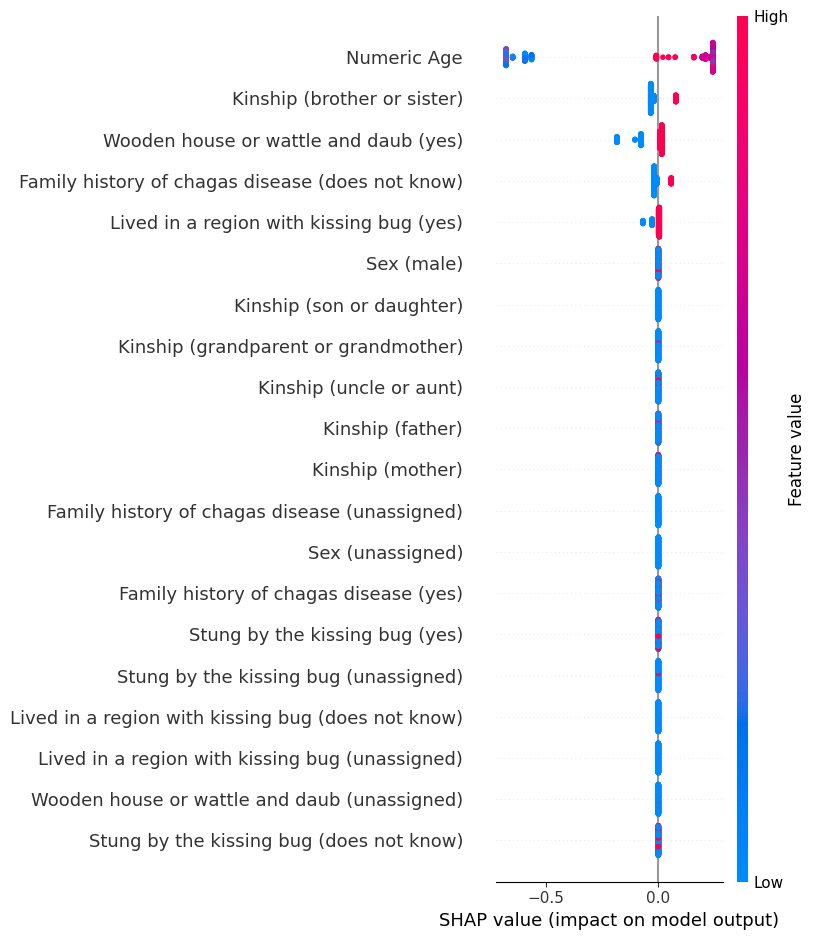

In [97]:
shap_values_test = shap.TreeExplainer(clf_xgboost_smote).shap_values(X_test)
shap.summary_plot(shap_values_test, X_test)

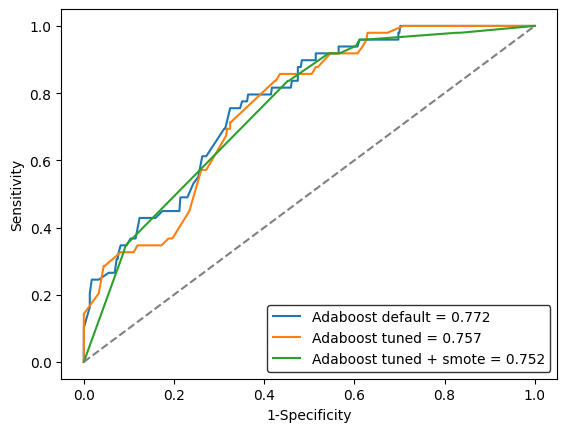

In [89]:
# adaboost roc auc
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_curve, roc_curve

# Precision-Recall
plt.figure(0).clf()
#%matplotlib inline

# Adaboost
fpr, tpr, _ = roc_curve(y_test, prob_pos_ada_default)
auc = round(roc_auc_score(y_test, prob_pos_ada_default), 3)
plt.plot(fpr,tpr,label="Adaboost default = "+str(auc))

# Adaboost + otimização
fpr, tpr, _ = roc_curve(y_test, prob_pos_ada)
auc = round(roc_auc_score(y_test, prob_pos_ada), 3)
plt.plot(fpr,tpr,label="Adaboost tuned = "+str(auc))

# Adaboost + otimização
fpr, tpr, _ = roc_curve(y_test, prob_pos_ada_res)
auc = round(roc_auc_score(y_test, prob_pos_ada_res), 3)
plt.plot(fpr,tpr,label="Adaboost tuned + smote = "+str(auc))

plt.plot([0, 1], [0, 1],"--", color = "grey")
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.legend(prop={'size': 8})
plt.grid(False)

plt.legend(prop={'size': 6})
plt.legend(frameon=True).get_frame().set_edgecolor('black')

plt.savefig('auc_roc_adaboost.png', format='png', dpi=1200, bbox_inches='tight')

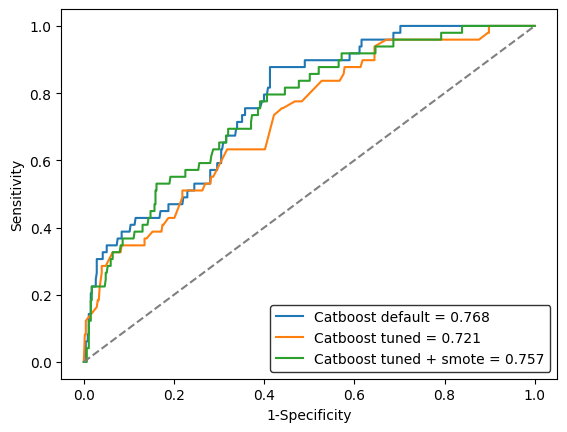

In [96]:
# Catboost roc auc
# Precision-Recall
plt.figure(0).clf()
#%matplotlib inline

# catboost
fpr, tpr, _ = roc_curve(y_test, prob_pos_catboost_default)
auc = round(roc_auc_score(y_test, prob_pos_catboost_default), 3)
plt.plot(fpr,tpr,label="Catboost default = "+str(auc))

# catboost + otimização
fpr, tpr, _ = roc_curve(y_test, prob_pos_catboost)
auc = round(roc_auc_score(y_test, prob_pos_catboost), 3)
plt.plot(fpr,tpr,label="Catboost tuned = "+str(auc))

# catboost + otimização
fpr, tpr, _ = roc_curve(y_test, prob_pos_catboost_smote)
auc = round(roc_auc_score(y_test, prob_pos_catboost_smote), 3)
plt.plot(fpr,tpr,label="Catboost tuned + smote = "+str(auc))

plt.plot([0, 1], [0, 1],"--", color = "grey")
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.legend(prop={'size': 8})
plt.grid(False)

plt.legend(prop={'size': 6})
plt.legend(frameon=True).get_frame().set_edgecolor('black')

plt.savefig('auc_roc_catboost.png', format='png', dpi=1200)

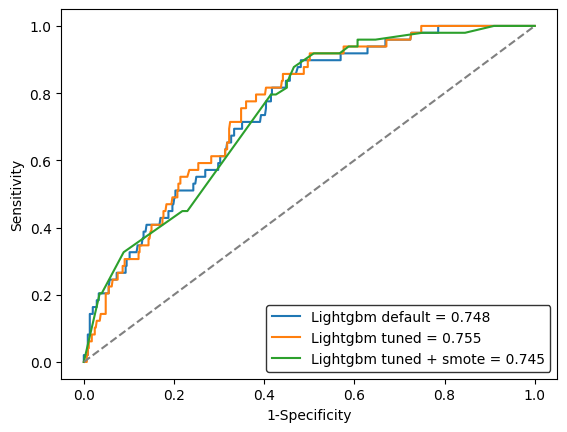

In [95]:
# lightgbm auc roc
# Precision-Recall
plt.figure(0).clf()
#%matplotlib inline

# Lightgbm
fpr, tpr, _ = roc_curve(y_test, prob_pos_lgbm_default)
auc = round(roc_auc_score(y_test, prob_pos_lgbm_default), 3)
plt.plot(fpr,tpr,label="Lightgbm default = "+str(auc))

# Lightgbm + otimização
fpr, tpr, _ = roc_curve(y_test, prob_pos_lgbm)
auc = round(roc_auc_score(y_test, prob_pos_lgbm), 3)
plt.plot(fpr,tpr,label="Lightgbm tuned = "+str(auc))

# Lightgbm + otimização
fpr, tpr, _ = roc_curve(y_test, prob_pos_lgbm_smote)
auc = round(roc_auc_score(y_test, prob_pos_lgbm_smote), 3)
plt.plot(fpr,tpr,label="Lightgbm tuned + smote = "+str(auc))


plt.plot([0, 1], [0, 1],"--", color = "grey")
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.legend(prop={'size': 8})
plt.grid(False)

plt.legend(prop={'size': 6})
plt.legend(frameon=True).get_frame().set_edgecolor('black')

plt.savefig('auc_roc_lightgbm.png', format='png', dpi=1200)

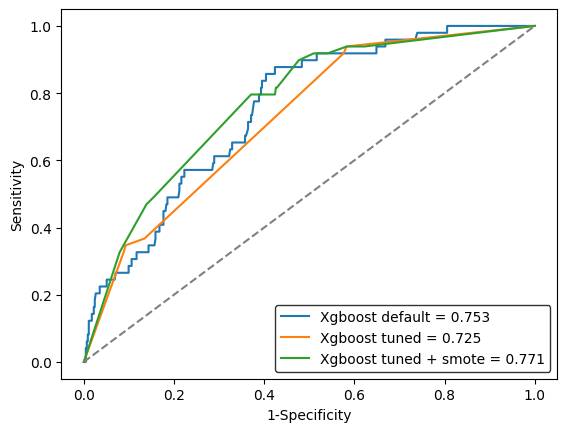

In [94]:
#xgboost auc-roc

# Precision-Recall
plt.figure(0).clf()
#%matplotlib inline

# Xgboost
fpr, tpr, _ = roc_curve(y_test, prob_pos_xgboost_default)
auc = round(roc_auc_score(y_test, prob_pos_xgboost_default), 3)
plt.plot(fpr,tpr,label="Xgboost default = "+str(auc))

# Xgboost + otimização
fpr, tpr, _ = roc_curve(y_test, prob_pos_xgboost)
auc = round(roc_auc_score(y_test, prob_pos_xgboost), 3)
plt.plot(fpr,tpr,label="Xgboost tuned = "+str(auc))

# Xgboost + otimização
fpr, tpr, _ = roc_curve(y_test, prob_pos_xgboost_smote)
auc = round(roc_auc_score(y_test, prob_pos_xgboost_smote), 3)
plt.plot(fpr,tpr,label="Xgboost tuned + smote = "+str(auc))

plt.plot([0, 1], [0, 1],"--", color = "grey")
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.legend(prop={'size': 8})
plt.grid(False)

plt.legend(prop={'size': 6})
plt.legend(frameon=True).get_frame().set_edgecolor('black')

plt.savefig('auc_roc_xgboost.png', format='png', dpi=1200)

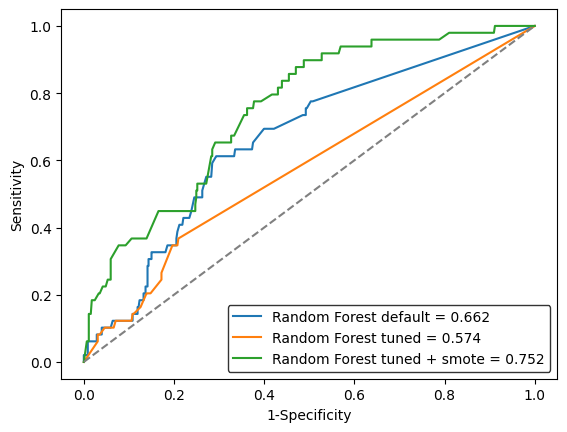

In [93]:
# random forest - aucroc
# Precision-Recall
plt.figure(0).clf()
#%matplotlib inline

# Random Forest
fpr, tpr, _ = roc_curve(y_test, prob_pos_rf_default)
auc = round(roc_auc_score(y_test, prob_pos_rf_default), 3)
plt.plot(fpr,tpr,label="Random Forest default = "+str(auc))

# Random Forest + otimização
fpr, tpr, _ = roc_curve(y_test, prob_pos_rf)
auc = round(roc_auc_score(y_test, prob_pos_rf), 3)
plt.plot(fpr,tpr,label="Random Forest tuned = "+str(auc))

# Random Forest + otimização
fpr, tpr, _ = roc_curve(y_test, prob_pos_rf_smote)
auc = round(roc_auc_score(y_test, prob_pos_rf_smote), 3)
plt.plot(fpr,tpr,label="Random Forest tuned + smote = "+str(auc))


plt.plot([0, 1], [0, 1],"--", color = "grey")
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.legend(prop={'size': 8})
plt.grid(False)

plt.legend(prop={'size': 6})
plt.legend(frameon=True).get_frame().set_edgecolor('black')

plt.savefig('auc_roc_rf.png', format='png', dpi=1200)

### Calculating the Adaboost feature importance through alleatory permutation

In [86]:
from sklearn.inspection import permutation_importance
result = permutation_importance(ada_default, X_test, y_test, n_repeats=10, random_state=42)


In [87]:

result['importances_mean']= abs(result['importances_mean'])


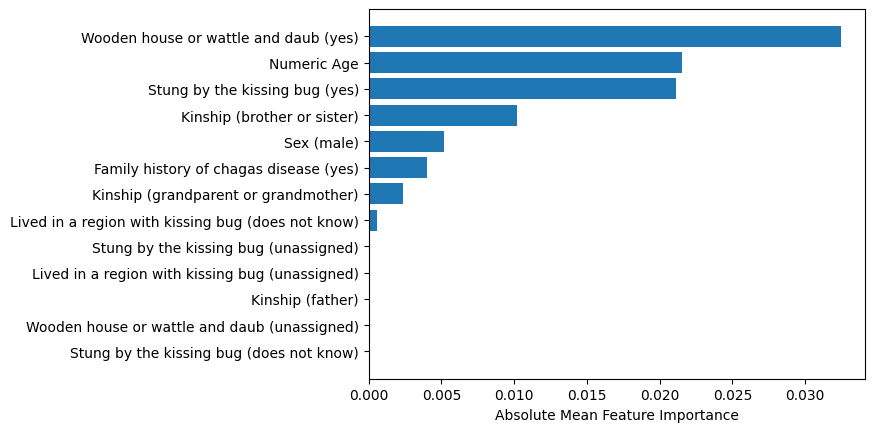

In [88]:
selected_columns = result.importances_mean > 0

sorted_idx = result.importances_mean.argsort()[::-1]

fig, ax = plt.subplots()
ax.barh(X_test.columns[sorted_idx][selected_columns], result.importances_mean[sorted_idx][selected_columns])

ax.set_yticklabels(X_test.columns[sorted_idx][selected_columns], rotation=0)

ax.set_xlabel("Absolute Mean Feature Importance")


ax.grid(False)

ax.invert_yaxis()

plt.show()

In [105]:
prediction=ada_default.predict_proba(X_test)[:,1]
prediction

array([0.47290341, 0.46627732, 0.48144518, 0.50457857, 0.30126872,
       0.5016089 , 0.4899685 , 0.30652712, 0.31104897, 0.30744973,
       0.29970221, 0.49316789, 0.51023362, 0.49739657, 0.31110785,
       0.49739657, 0.47929174, 0.50148046, 0.50474694, 0.50205593,
       0.49938189, 0.4899685 , 0.47597559, 0.48051071, 0.51199103,
       0.5005586 , 0.49127927, 0.49685633, 0.48903309, 0.49419612,
       0.49419612, 0.29567225, 0.5016089 , 0.50633664, 0.51068047,
       0.50029767, 0.30691234, 0.30080417, 0.314845  , 0.49915483,
       0.49870778, 0.30856763, 0.49286876, 0.49121297, 0.5016089 ,
       0.46881571, 0.48141589, 0.29879282, 0.314845  , 0.50872581,
       0.47799985, 0.30744973, 0.30478681, 0.30133552, 0.30126872,
       0.5073334 , 0.50336713, 0.30899939, 0.49475754, 0.30495292,
       0.30744973, 0.49185695, 0.46904191, 0.50778035, 0.49993968,
       0.48033332, 0.49870778, 0.50152956, 0.47862994, 0.49585118,
       0.5090912 , 0.49915483, 0.47290341, 0.31110785, 0.49915

In [110]:
threshold = 0.65
y_pred65 = (prob_pos_ada_default > threshold).astype(int)


In [111]:
threshold = 0.60
y_pred65 = (prob_pos_ada_default > threshold).astype(int)

print('Adaboost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred65)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred65)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred65)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_ada_default)))
print("F1-Score: {:.4f}".format(f1_score(y_test, y_pred65)))

print(classification_report(y_test, y_pred65))

Adaboost Model
Accuracy: 0.9024
Precision: 0.0000
Recall: 0.0000
AUC: 0.7716
F1-Score: 0.0000
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       453
           1       0.00      0.00      0.00        49

    accuracy                           0.90       502
   macro avg       0.45      0.50      0.47       502
weighted avg       0.81      0.90      0.86       502



In [164]:
#from sklearn.metrics import true_positive, false_positive
# Defining the threshold grid
thresholds = [0.2,0.25,0.3,0.35,0.4,0.45,
              0.5,0.55, 0.6,#0.65,
              0.7#,0.75, 0.8,0.85
             ]

threshold_values = []
recall_values = []
precision_values = []
accuracy_values = []
f1_values = []
auc_values = []
true_positive = []
false_positive = []
positive_prediction = []
true_negative = []
false_negative = []
negative_prediction = []


# generating the predictions for each threshold
for threshold in thresholds:
    y_pred = (prob_pos_ada_default > threshold).astype(int)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, prob_pos_ada_default)
    tp_count = np.count_nonzero((y_pred == 1) & (y_test == 1))
    fp_count = np.count_nonzero((y_pred == 1) & (y_test == 0))
    pos_prediction = tp_count + fp_count
    tn_count = np.count_nonzero((y_pred == 0) & (y_test == 0))
    fn_count = np.count_nonzero((y_pred == 0) & (y_test == 1))
    neg_prediction = tn_count + fn_count

    
    # Setting values for each metric
    threshold_values.append(threshold)
    recall_values.append(recall)
    precision_values.append(precision)
    accuracy_values.append(accuracy)
    f1_values.append(f1)
    auc_values.append(auc)
    true_positive.append(tp_count)
    false_positive.append(fp_count)
    positive_prediction.append(pos_prediction)
    true_negative.append(tn_count)
    false_negative.append(fn_count)
    negative_prediction.append(neg_prediction)    

# Creating a data frame
df = pd.DataFrame({
    'Threshold': threshold_values,
    'Recall': recall_values,
    'Precision': precision_values,
    'Accuracy': accuracy_values,
    'F1-Score': f1_values,
    'AUC': auc_values,
    'TP': true_positive,
    'FP': false_positive,
    'TP+FP': positive_prediction,
    'TN': true_negative,
    'FN': false_negative,
    'TN+FN': negative_prediction
})
df['Total'] = df['TN+FN'] + df['TP+FP']
display(df)

,Threshold,Recall,Precision,Accuracy,F1-Score,AUC,TP,FP,TP+FP,TN,FN,TN+FN,Total
0,0.200000,1.000000,0.098394,0.105578,0.179159,0.771568,49,449,498,4,0,4,502
1,0.250000,1.000000,0.098394,0.105578,0.179159,0.771568,49,449,498,4,0,4,502
2,0.300000,1.000000,0.102296,0.143426,0.185606,0.771568,49,430,479,23,0,23,502
3,0.350000,1.000000,0.125964,0.322709,0.223744,0.771568,49,340,389,113,0,113,502
4,0.400000,1.000000,0.125964,0.322709,0.223744,0.771568,49,340,389,113,0,113,502
5,0.450000,1.000000,0.125964,0.322709,0.223744,0.771568,49,340,389,113,0,113,502
6,0.500000,0.612245,0.198675,0.721116,0.300000,0.771568,30,121,151,332,19,351,502
7,0.550000,0.000000,0.000000,0.902390,0.000000,0.771568,0,0,0,453,49,502,502
8,0.600000,0.000000,0.000000,0.902390,0.000000,0.771568,0,0,0,453,49,502,502
9,0.700000,0.000000,0.000000,0.902390,0.000000,0.771568,0,0,0,453,49,502,502


In [166]:
exam_cost = 30
df['cost_full_population'] = df['Total'] * exam_cost
df['cost_TP_FP'] = (df['Total'] - df['TP+FP'])*exam_cost
df['saving'] = ((df['cost_TP_FP'] / df['cost_full_population']))
df

,Threshold,Recall,Precision,Accuracy,F1-Score,AUC,TP,FP,TP+FP,TN,FN,TN+FN,Total,cost_full_population,cost_TP_FP,saving
0,0.200000,1.000000,0.098394,0.105578,0.179159,0.771568,49,449,498,4,0,4,502,15060,120,0.007968
1,0.250000,1.000000,0.098394,0.105578,0.179159,0.771568,49,449,498,4,0,4,502,15060,120,0.007968
2,0.300000,1.000000,0.102296,0.143426,0.185606,0.771568,49,430,479,23,0,23,502,15060,690,0.045817
3,0.350000,1.000000,0.125964,0.322709,0.223744,0.771568,49,340,389,113,0,113,502,15060,3390,0.225100
4,0.400000,1.000000,0.125964,0.322709,0.223744,0.771568,49,340,389,113,0,113,502,15060,3390,0.225100
5,0.450000,1.000000,0.125964,0.322709,0.223744,0.771568,49,340,389,113,0,113,502,15060,3390,0.225100
6,0.500000,0.612245,0.198675,0.721116,0.300000,0.771568,30,121,151,332,19,351,502,15060,10530,0.699203
7,0.550000,0.000000,0.000000,0.902390,0.000000,0.771568,0,0,0,453,49,502,502,15060,15060,1.000000
8,0.600000,0.000000,0.000000,0.902390,0.000000,0.771568,0,0,0,453,49,502,502,15060,15060,1.000000
9,0.700000,0.000000,0.000000,0.902390,0.000000,0.771568,0,0,0,453,49,502,502,15060,15060,1.000000


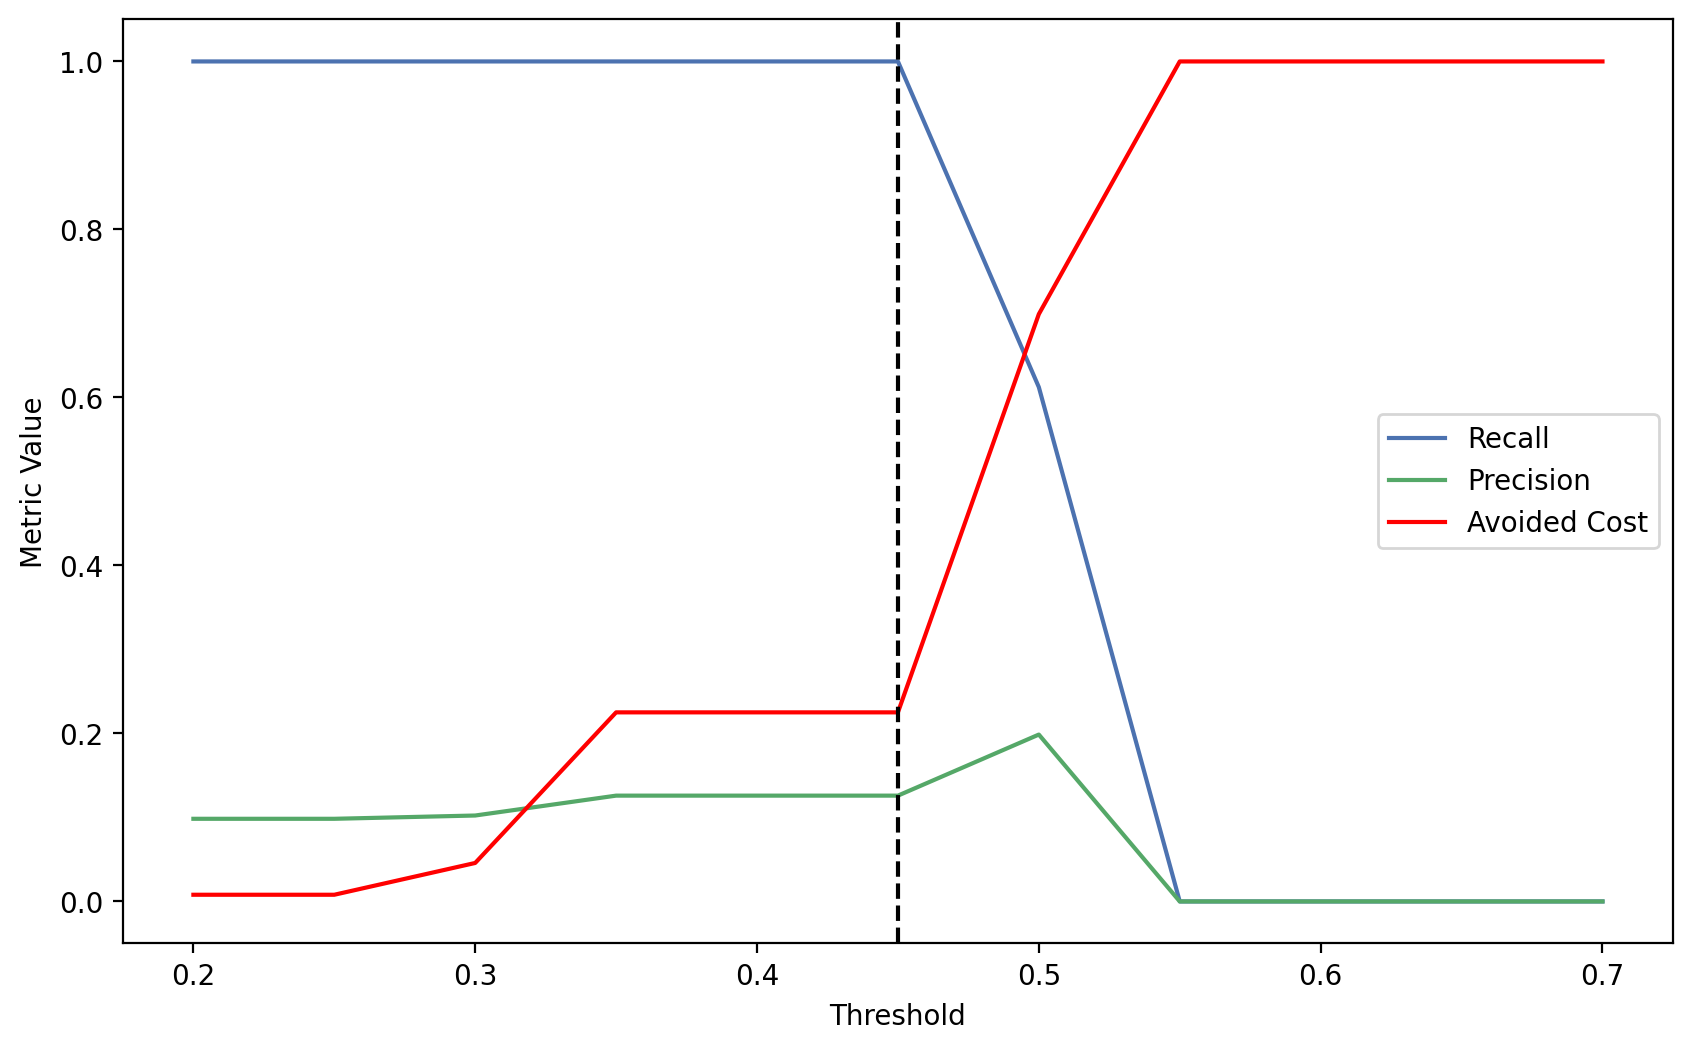

In [167]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams["figure.figsize"] = [10, 6]
plt.style.use("seaborn-deep")
%config InlineBackend.figure_format = 'retina'
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
#rc('mathtext',**{'default':'regular'})


# Plotar o gráfico
plt.plot(df['Threshold'], df['Recall'], label='Recall')
plt.plot(df['Threshold'], df['Precision'], label='Precision')

# Plotar a linha de saving somente quando o recall for igual a 1
saving_values = [df['saving'][i] if df['Recall'][i] >= 0 else None for i in range(len(df))]
plt.plot(df['Threshold'], saving_values, label='Avoided Cost', color='red')

# Adicionar uma linha vertical no último ponto em que houve economia de custo
last_saving_point = max([i for i in range(len(df)) if df['Recall'][i] == 1])
plt.axvline(x=df['Threshold'][last_saving_point], color='black', linestyle='--')

# Adicionar legenda e títulos do gráfico
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Metric Value')



plt.grid(False)

# Exibir o gráfico
plt.show()





# Shap values for individual patients

In [92]:
# create a KernelExplainer object for the Adaboost model
explainer = shap.KernelExplainer(ada_default.predict, shap.sample(X_train, 100))

# calculate the SHAP values for the test data
shap_values = explainer.shap_values(X_test)


  0%|          | 0/502 [00:00<?, ?it/s]

In [191]:
y_pred_ada_default

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,

In [172]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [98]:
# True Positive

i = 17

shap.force_plot(explainer.expected_value, shap_values[i], features=X_test.iloc[i], 
                feature_names=X_test.columns, matplotlib=True, show=False)

plt.savefig("shap_tp.svg",dpi=150, bbox_inches='tight')

# True Negative
i = 0
shap.force_plot(explainer.expected_value, shap_values[i], features=X_test.iloc[i], 
                feature_names=X_test.columns, matplotlib=True, show=False)

plt.savefig("shap_tn.svg",dpi=150, bbox_inches='tight')

# False Positive
i = 19
shap.force_plot(explainer.expected_value, shap_values[i], features=X_test.iloc[i], 
                feature_names=X_test.columns, matplotlib=True, show=False)

plt.savefig("shap_fp.svg",dpi=150, bbox_inches='tight')

# False Negative
i = 62
shap.force_plot(explainer.expected_value, shap_values[i], features=X_test.iloc[i], 
                feature_names=X_test.columns, matplotlib=True, show=False)

plt.savefig("shap_fn.svg",dpi=150, bbox_inches='tight')

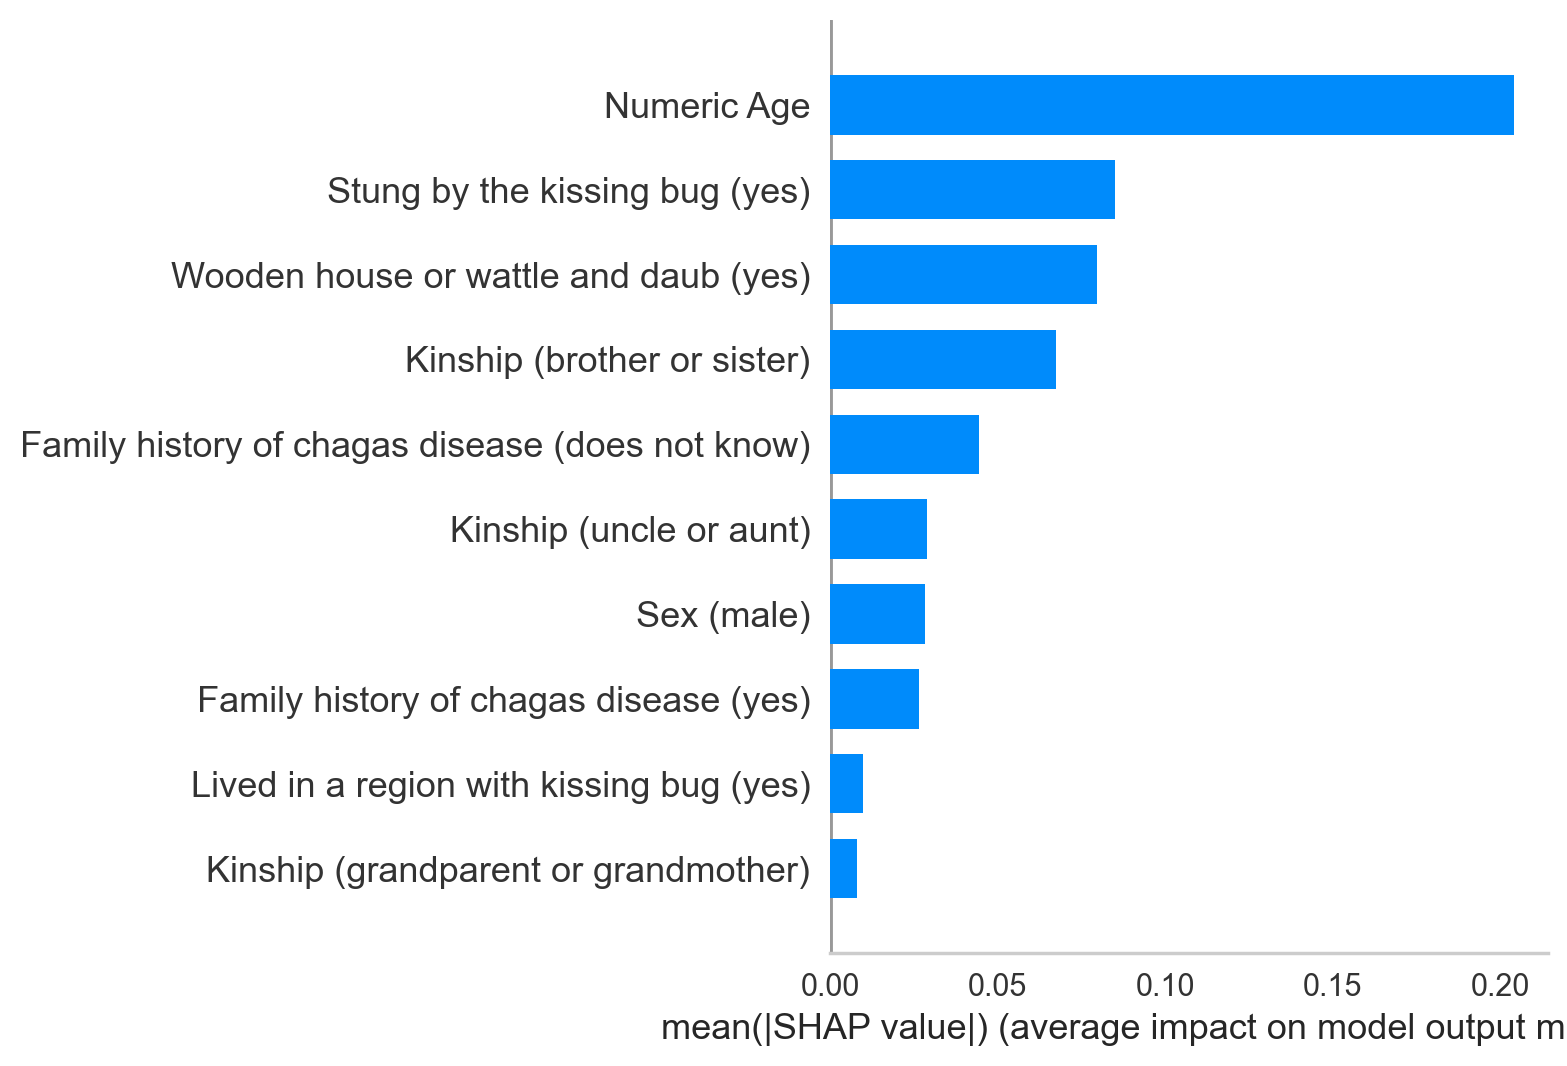

In [202]:
shap.summary_plot(shap_values, X_test, plot_type='bar', max_display=10)